In [1]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
#from pandas.util.testing import assert_frame_equal
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
#sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 2 # I'm seeding with 2, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

In [2]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf

In [3]:
GOOG = yf.download("GOOG", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of Google
AAPL = yf.download("AAPL", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of Apple
NVDA = yf.download("NVDA", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of Nividia
AMZN = yf.download("AMZN", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of Amazon
MSFT = yf.download("MSFT", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of Microsoft
META = yf.download("META", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of Meta
AVGO = yf.download("AVGO", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of Broadcom
GSPC = yf.download("^GSPC", start="2015-01-01", end="2025-10-02",group_by="ticker") # Stock of S&P 500
print(GOOG.shape, AAPL.shape, NVDA.shape, AMZN.shape, MSFT.shape, META.shape, AVGO.shape, GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(2703, 5) (2703, 5) (2703, 5) (2703, 5) (2703, 5) (2703, 5) (2703, 5) (2703, 5)


In [5]:
AVGO

Ticker            AVGO                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2015-01-02    7.638375    7.735245    7.502151    7.574803  13500000
2015-01-05    7.573291    7.630051    7.446906    7.453717  15596000
2015-01-06    7.488530    7.498368    7.203216    7.284194  22194000
2015-01-07    7.344736    7.521827    7.305383    7.480960  30907000
2015-01-08    7.608105    7.893418    7.595239    7.854821  33265000
...                ...         ...         ...         ...       ...
2025-09-25  332.989990  338.059998  327.299988  336.100006  21678200
2025-09-26  337.429993  339.079987  330.579987  334.529999  15464700
2025-09-29  336.000000  341.049988  327.549988  327.899994  21336000
2025-09-30  330.119995  331.049988  324.609985  329.910004  20109500
2025-10-01  328.149994  337.950012  324.500000  333.390015  21122700

[2703 rows x 5 columns]

In [6]:
#GSPC.to_csv('GSPC.csv', index=False)
#GSPC['^GSPC']['Close']
#GSPC['^GSPC'].Close
GSPC

Ticker            ^GSPC                                                   
Price              Open         High          Low        Close      Volume
Date                                                                      
2015-01-02  2058.899902  2072.360107  2046.040039  2058.199951  2708700000
2015-01-05  2054.439941  2054.439941  2017.339966  2020.579956  3799120000
2015-01-06  2022.150024  2030.250000  1992.439941  2002.609985  4460110000
2015-01-07  2005.550049  2029.609985  2005.550049  2025.900024  3805480000
2015-01-08  2030.609985  2064.080078  2030.609985  2062.139893  3934010000
...                 ...          ...          ...          ...         ...
2025-09-25  6608.189941  6619.000000  6569.220215  6604.720215  5874670000
2025-09-26  6615.379883  6648.970215  6604.430176  6643.700195  5103110000
2025-09-29  6661.580078  6677.310059  6644.490234  6661.209961  5358760000
2025-09-30  6656.189941  6691.250000  6641.000000  6688.459961  6057210000
2025-10-01  6664.919922  6718.479980  6656.200195  6711.200195  6037950000

[2703 rows x 5 columns]

In [7]:
GOOG.isnull().sum()

Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [8]:
#Combining dataframes
dataset = pd.concat([GOOG['GOOG'].Close, AAPL['AAPL'].Close,NVDA['NVDA'].Close,AMZN['AMZN'].Close, MSFT['MSFT'].Close, META['META'].Close, AVGO['AVGO'].Close, GSPC['^GSPC'].Close],axis=1)
# Change the column names
dataset.columns =['GOOG', 'AAPL', 'NVDA','AMZN','MSFT', 'META', 'AVGO', 'GSPC']
dataset.head()

GOOG       AAPL      NVDA     AMZN       MSFT       META  \
Date                                                                        
2015-01-02  25.990791  24.261049  0.483038  15.4260  39.933044  77.969337   
2015-01-05  25.448997  23.577572  0.474880  15.1095  39.565830  76.717056   
2015-01-06  24.859165  23.579796  0.460482  14.7645  38.985123  75.683434   
2015-01-07  24.816574  23.910437  0.459282  14.9210  39.480438  75.683434   
2015-01-08  24.894821  24.829128  0.476559  15.0230  40.641876  77.700996   

                AVGO         GSPC  
Date                               
2015-01-02  7.574803  2058.199951  
2015-01-05  7.453717  2020.579956  
2015-01-06  7.284194  2002.609985  
2015-01-07  7.480960  2025.900024  
2015-01-08  7.854821  2062.139893

In [9]:
print('Shape of data',dataset.shape)

Shape of data (2703, 8)


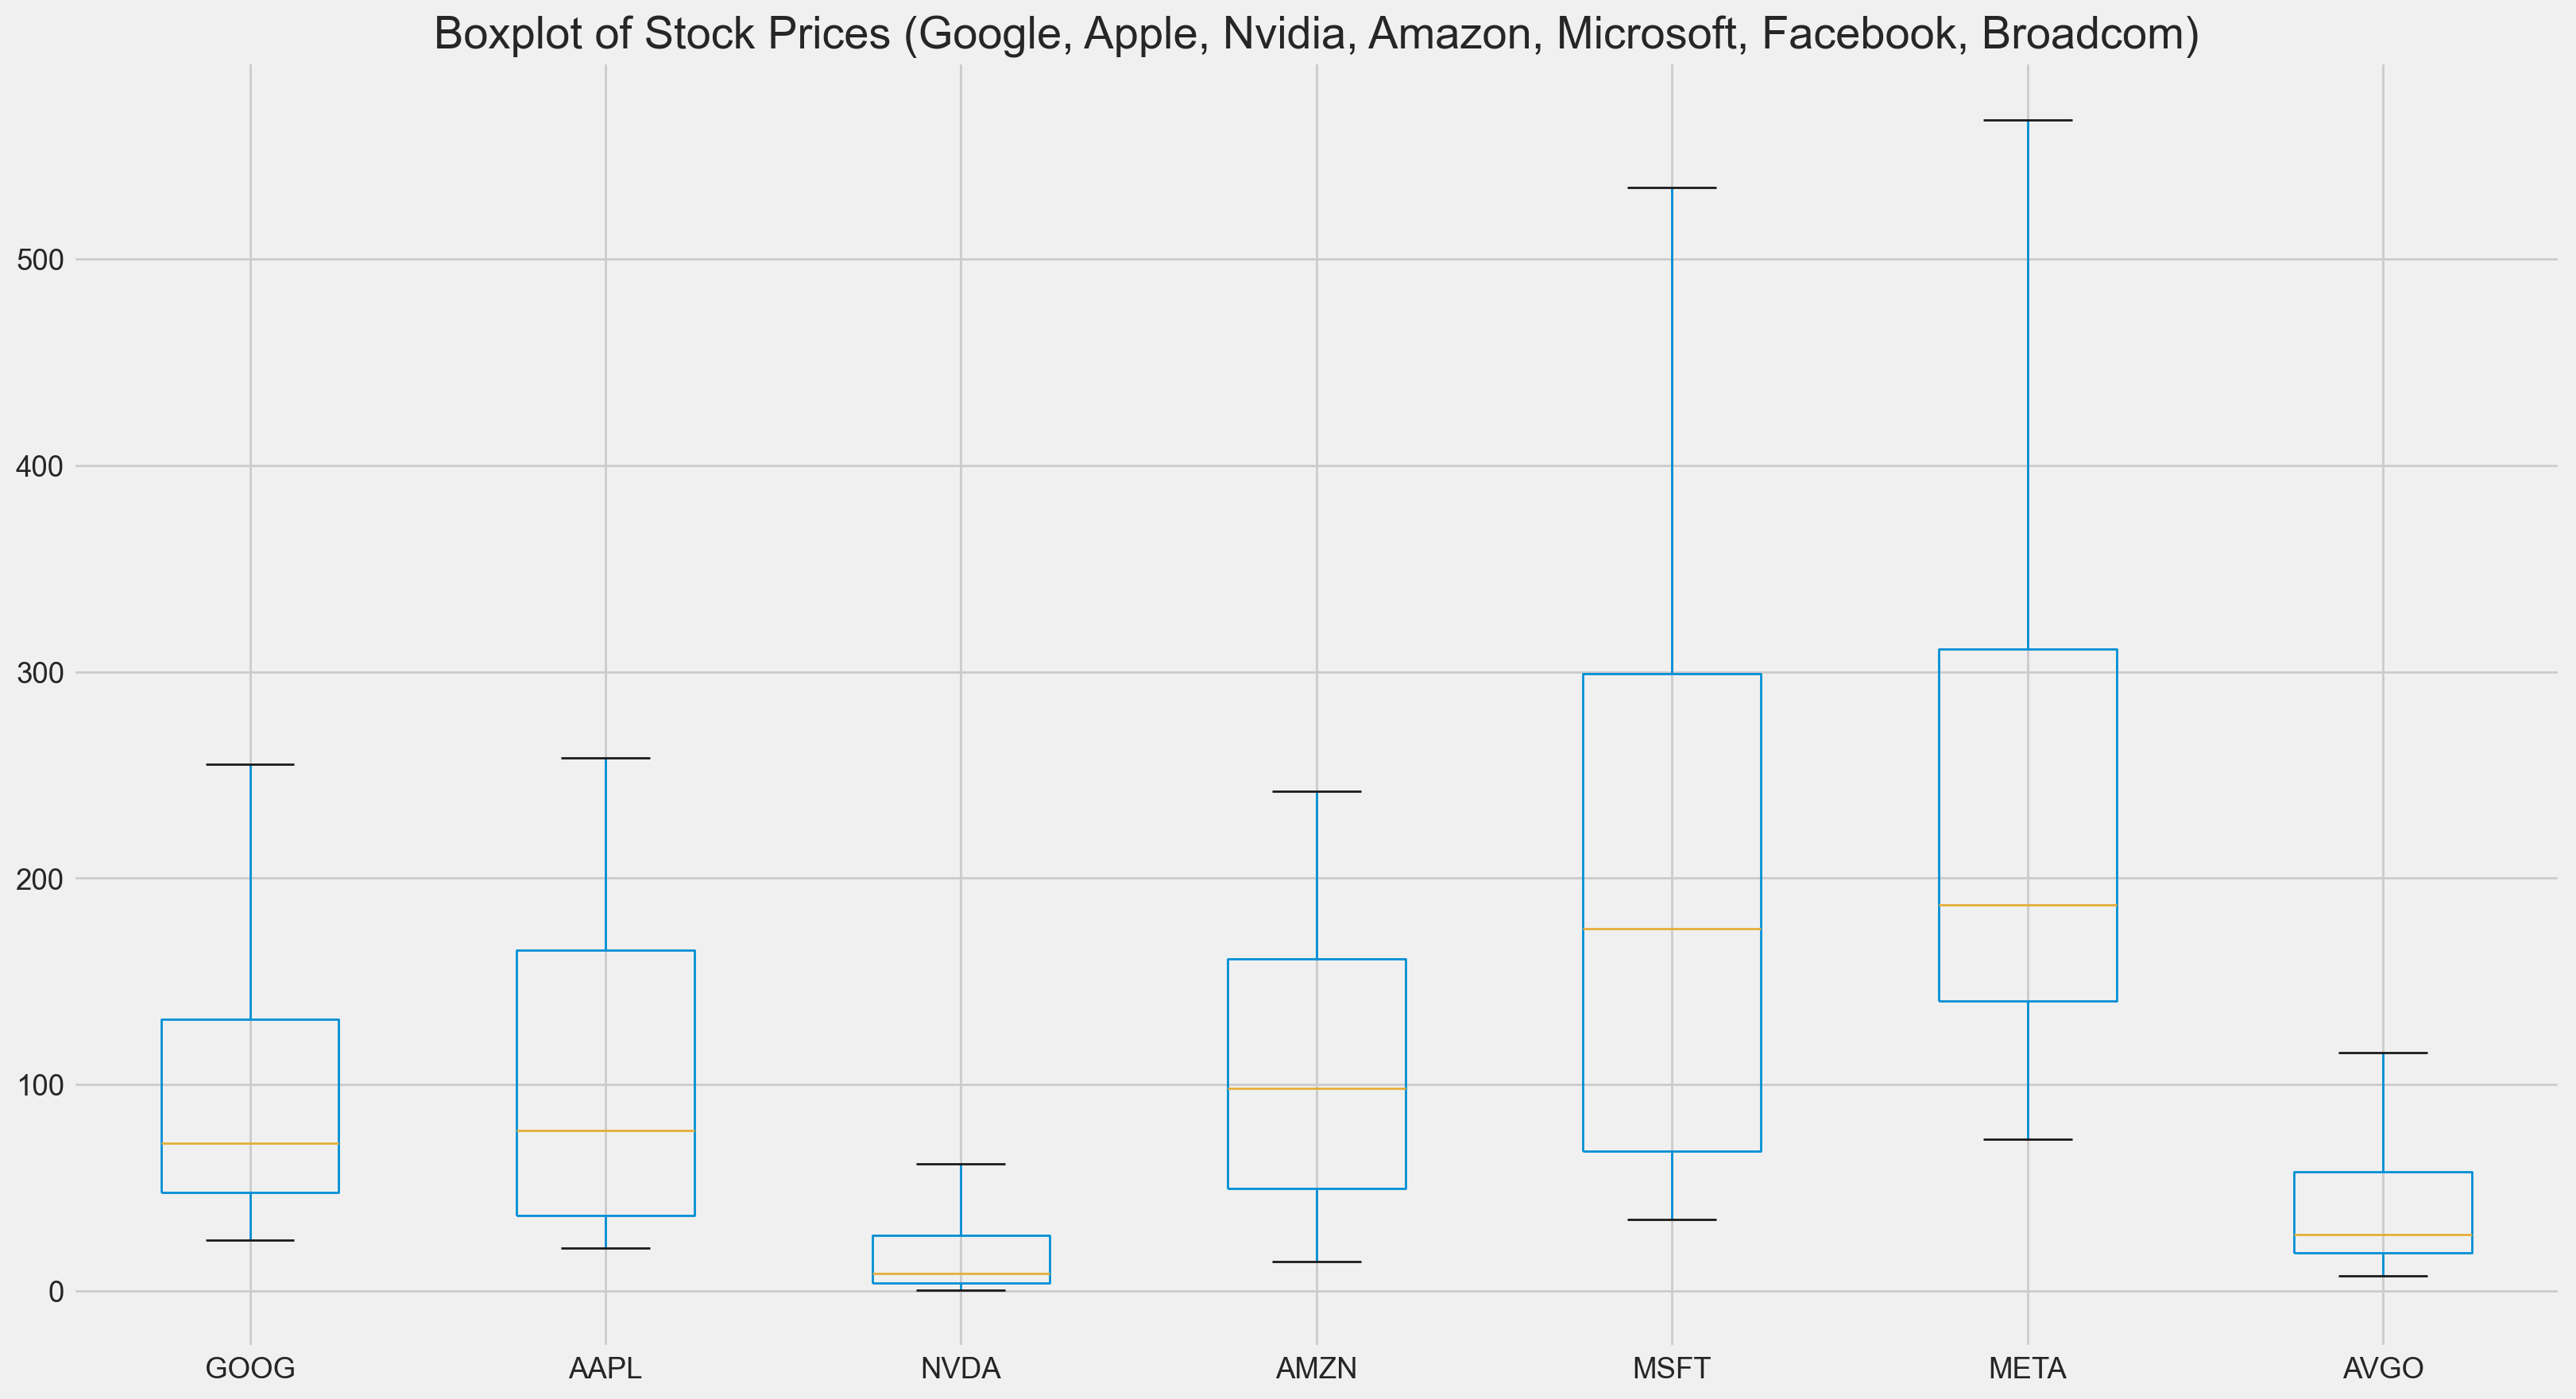

In [34]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','NVDA','AMZN','MSFT','META','AVGO']].boxplot(sym='')
plt.title("Boxplot of Stock Prices (Google, Apple, Nvidia, Amazon, Microsoft, Facebook, Broadcom)")
plt.show()

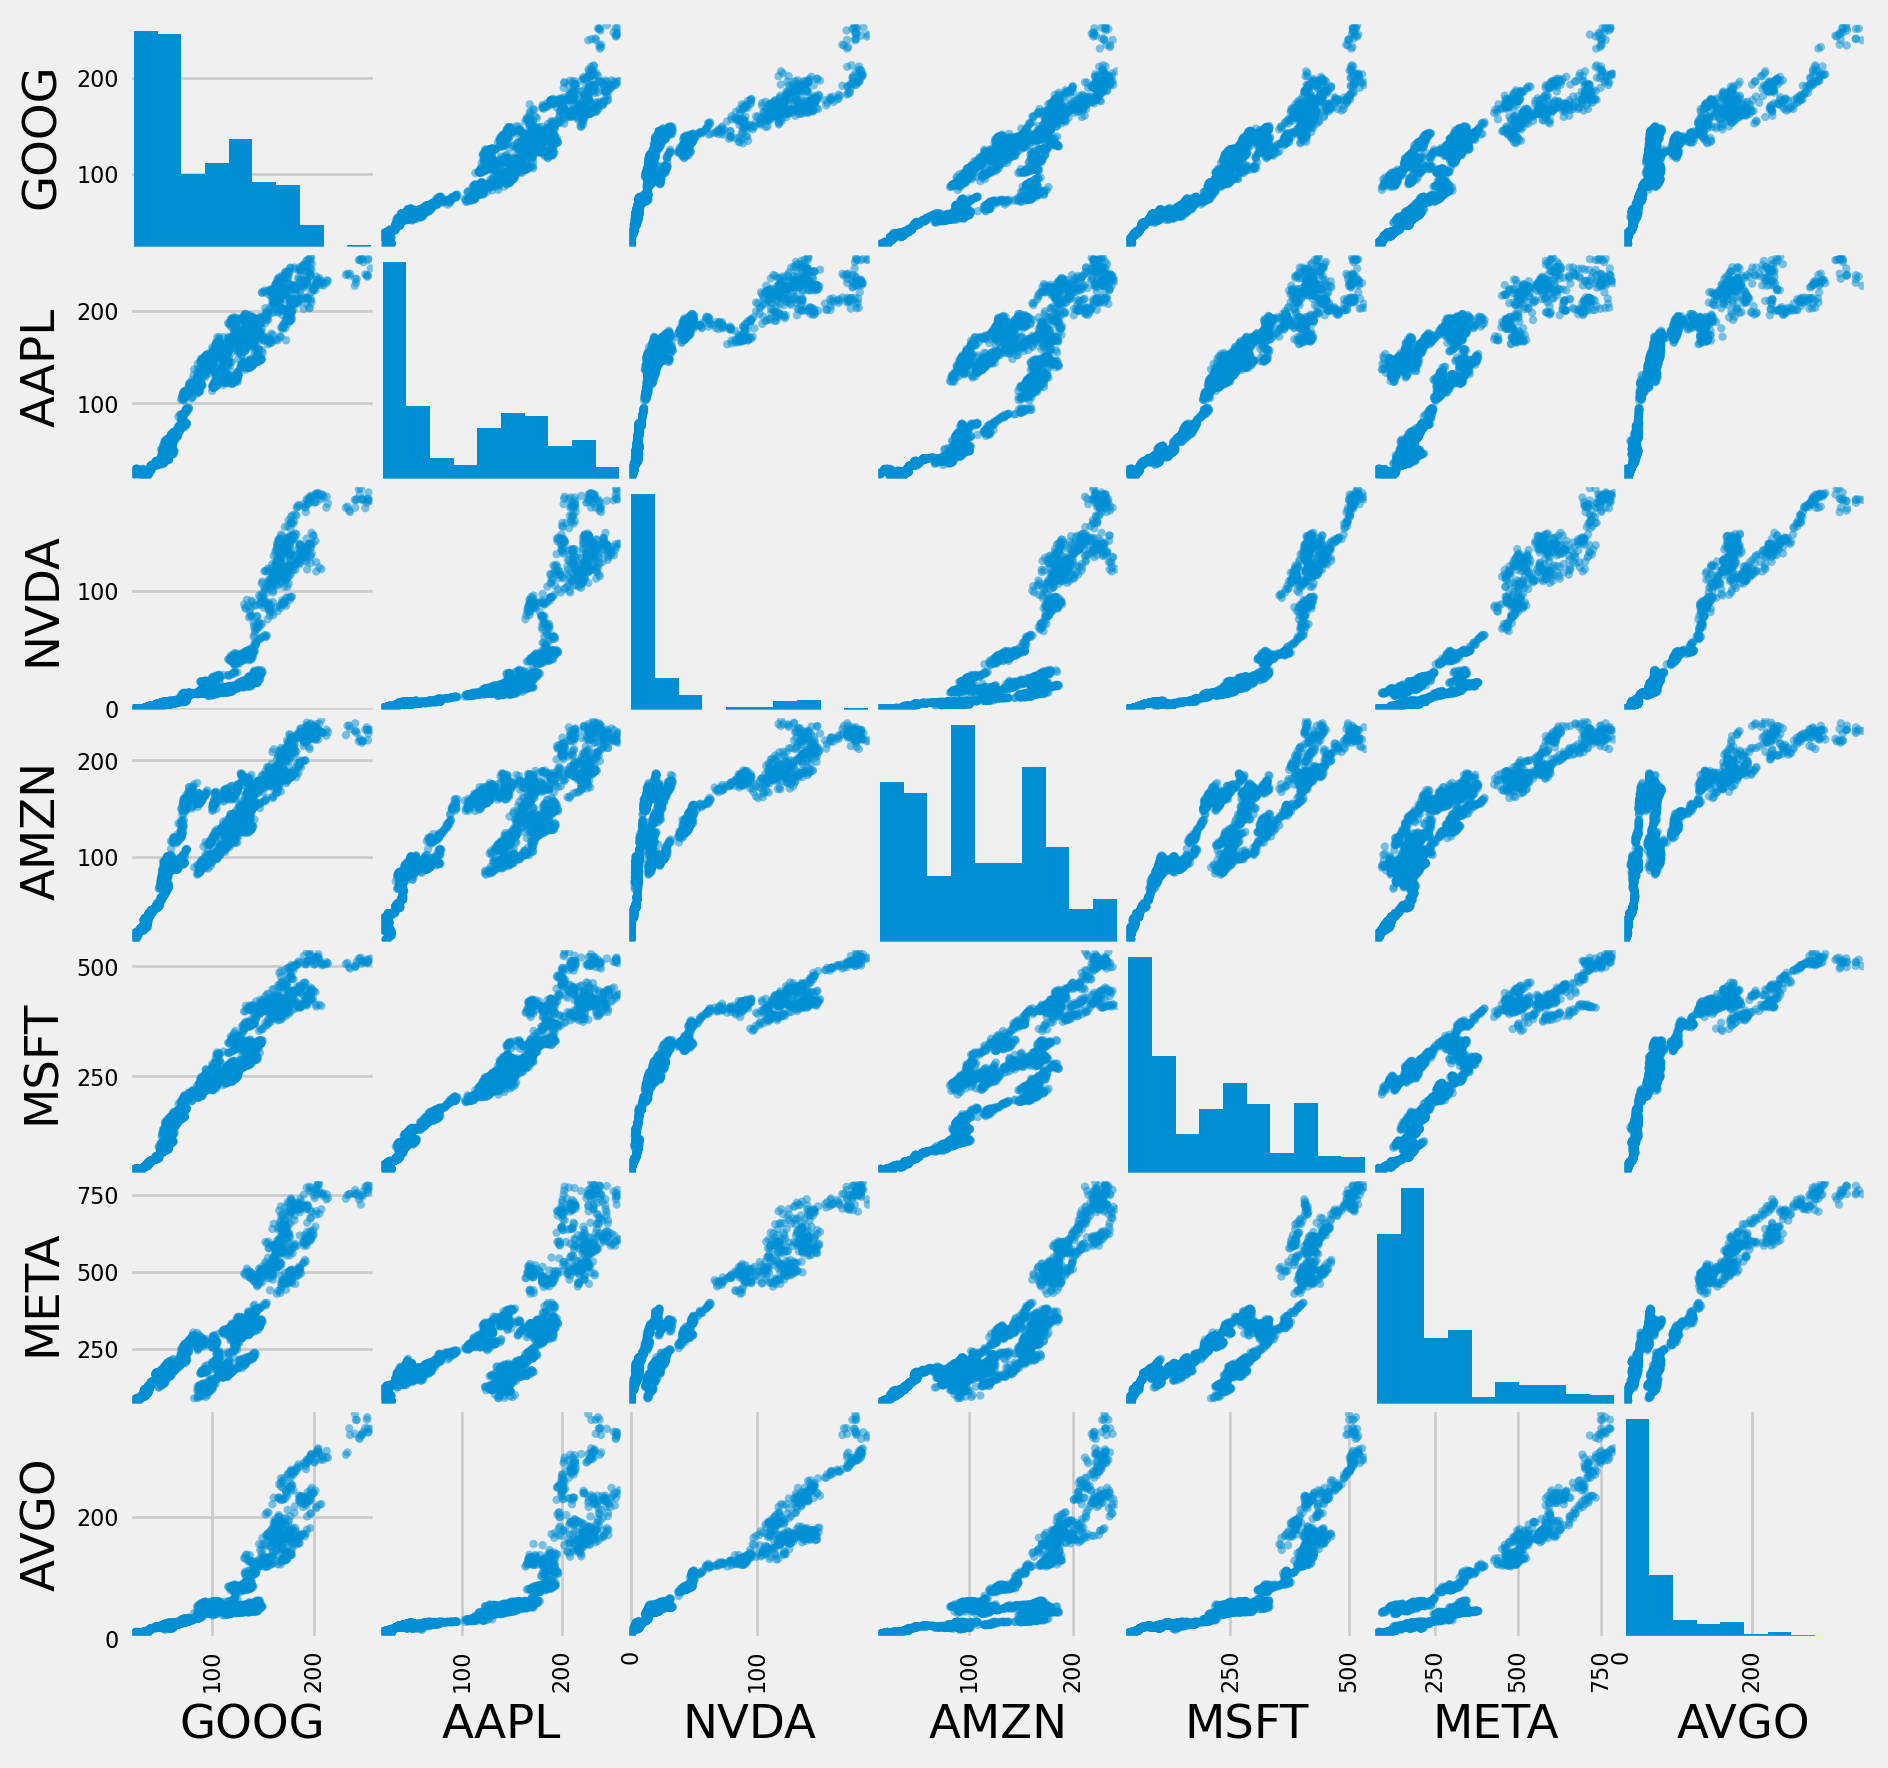

In [11]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','NVDA','AMZN','MSFT','META','AVGO']], figsize=(10,10))
plt.show()

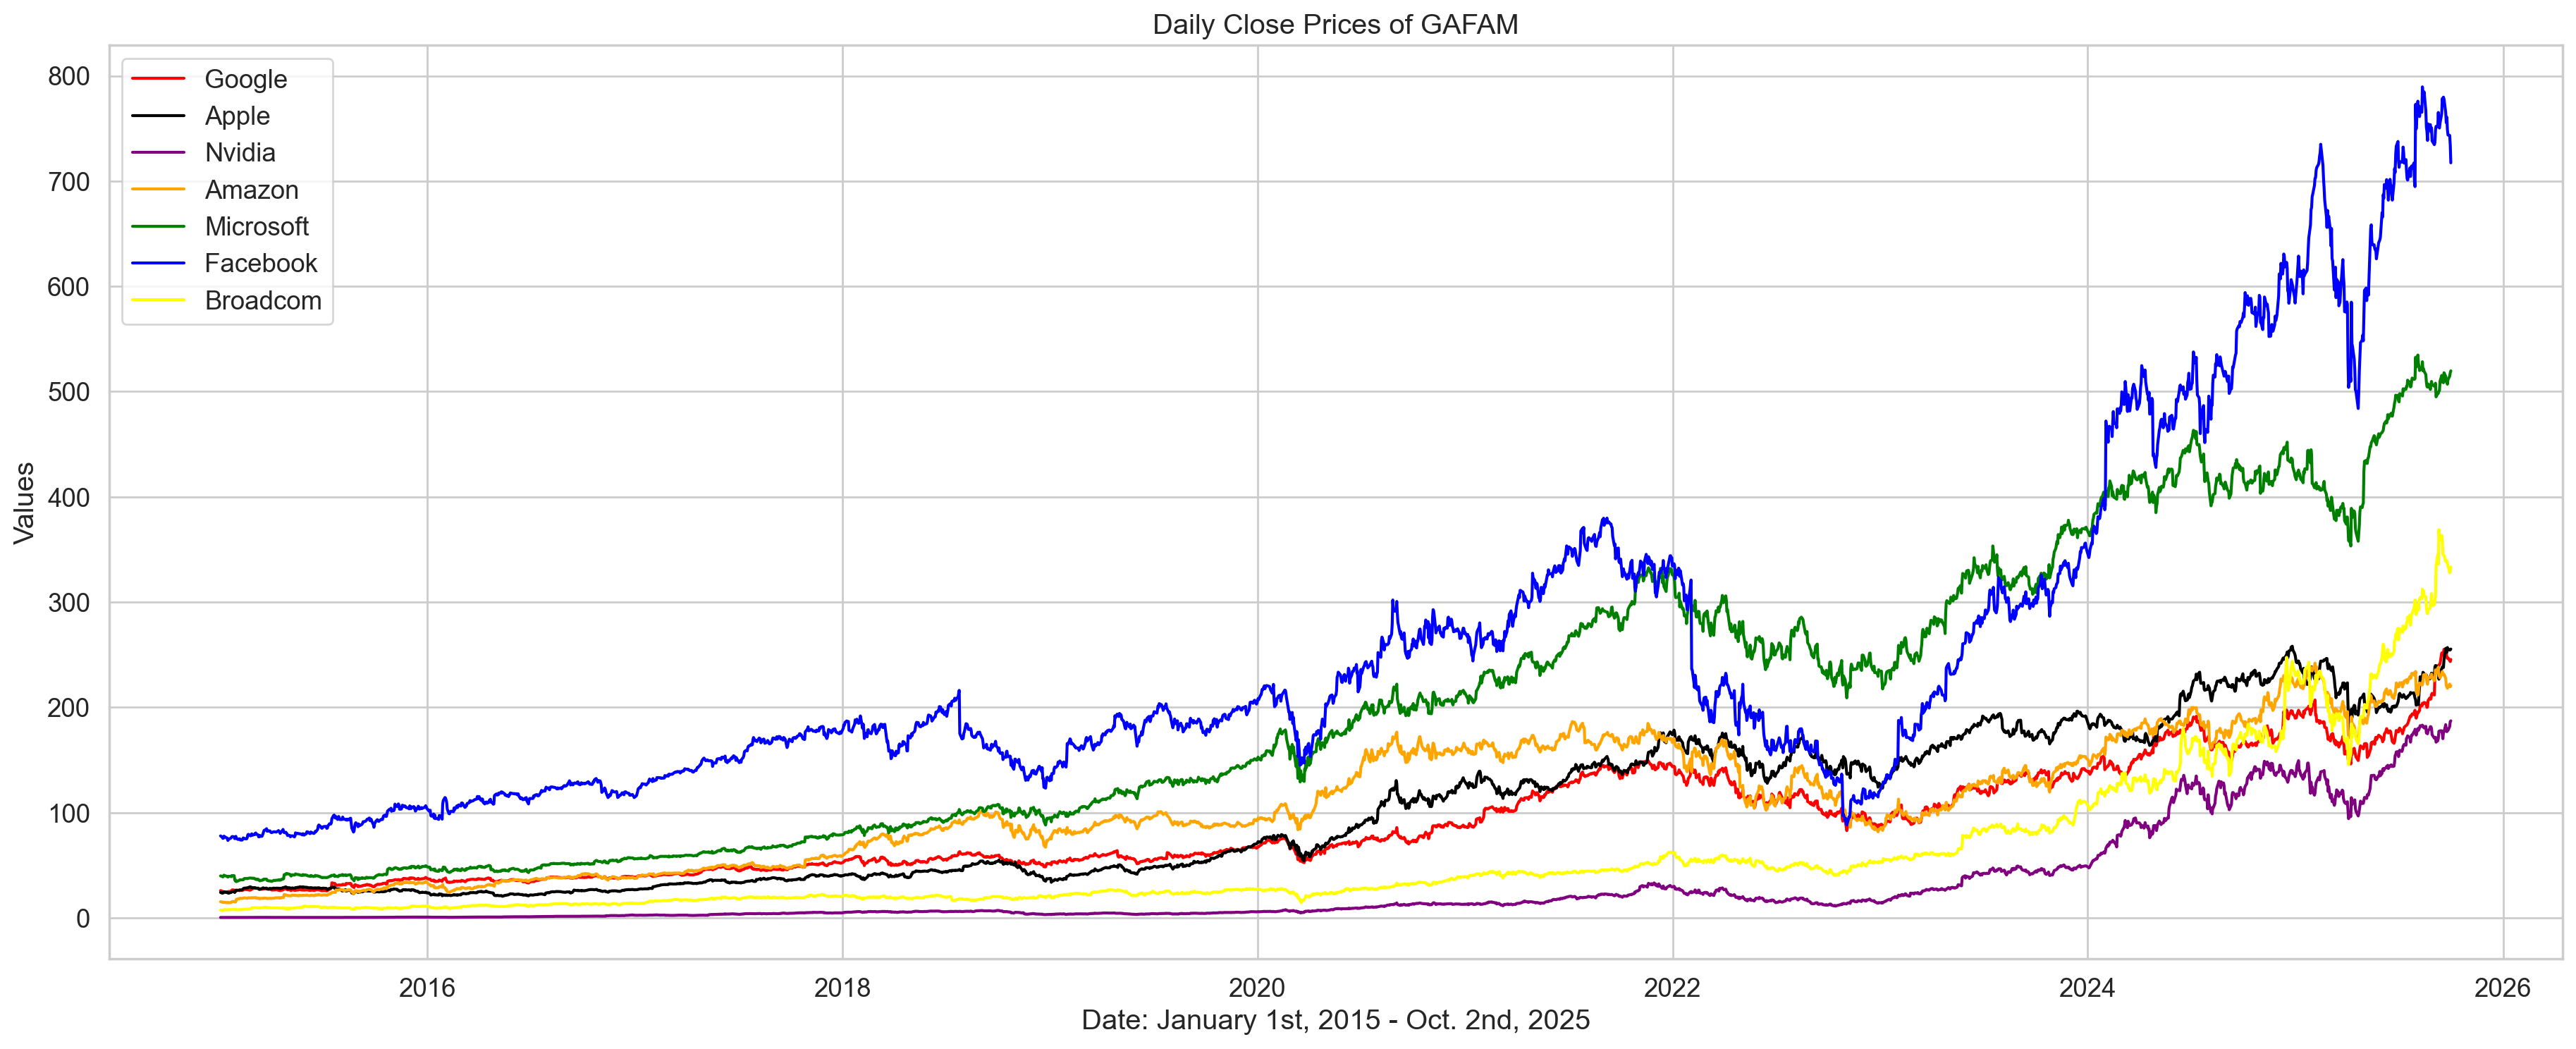

In [14]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: January 1st, 2015 - Oct. 2nd, 2025')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['NVDA'], 'purple', label='Nvidia')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AVGO'], 'yellow', label='Broadcom')
plt.legend()
plt.show()

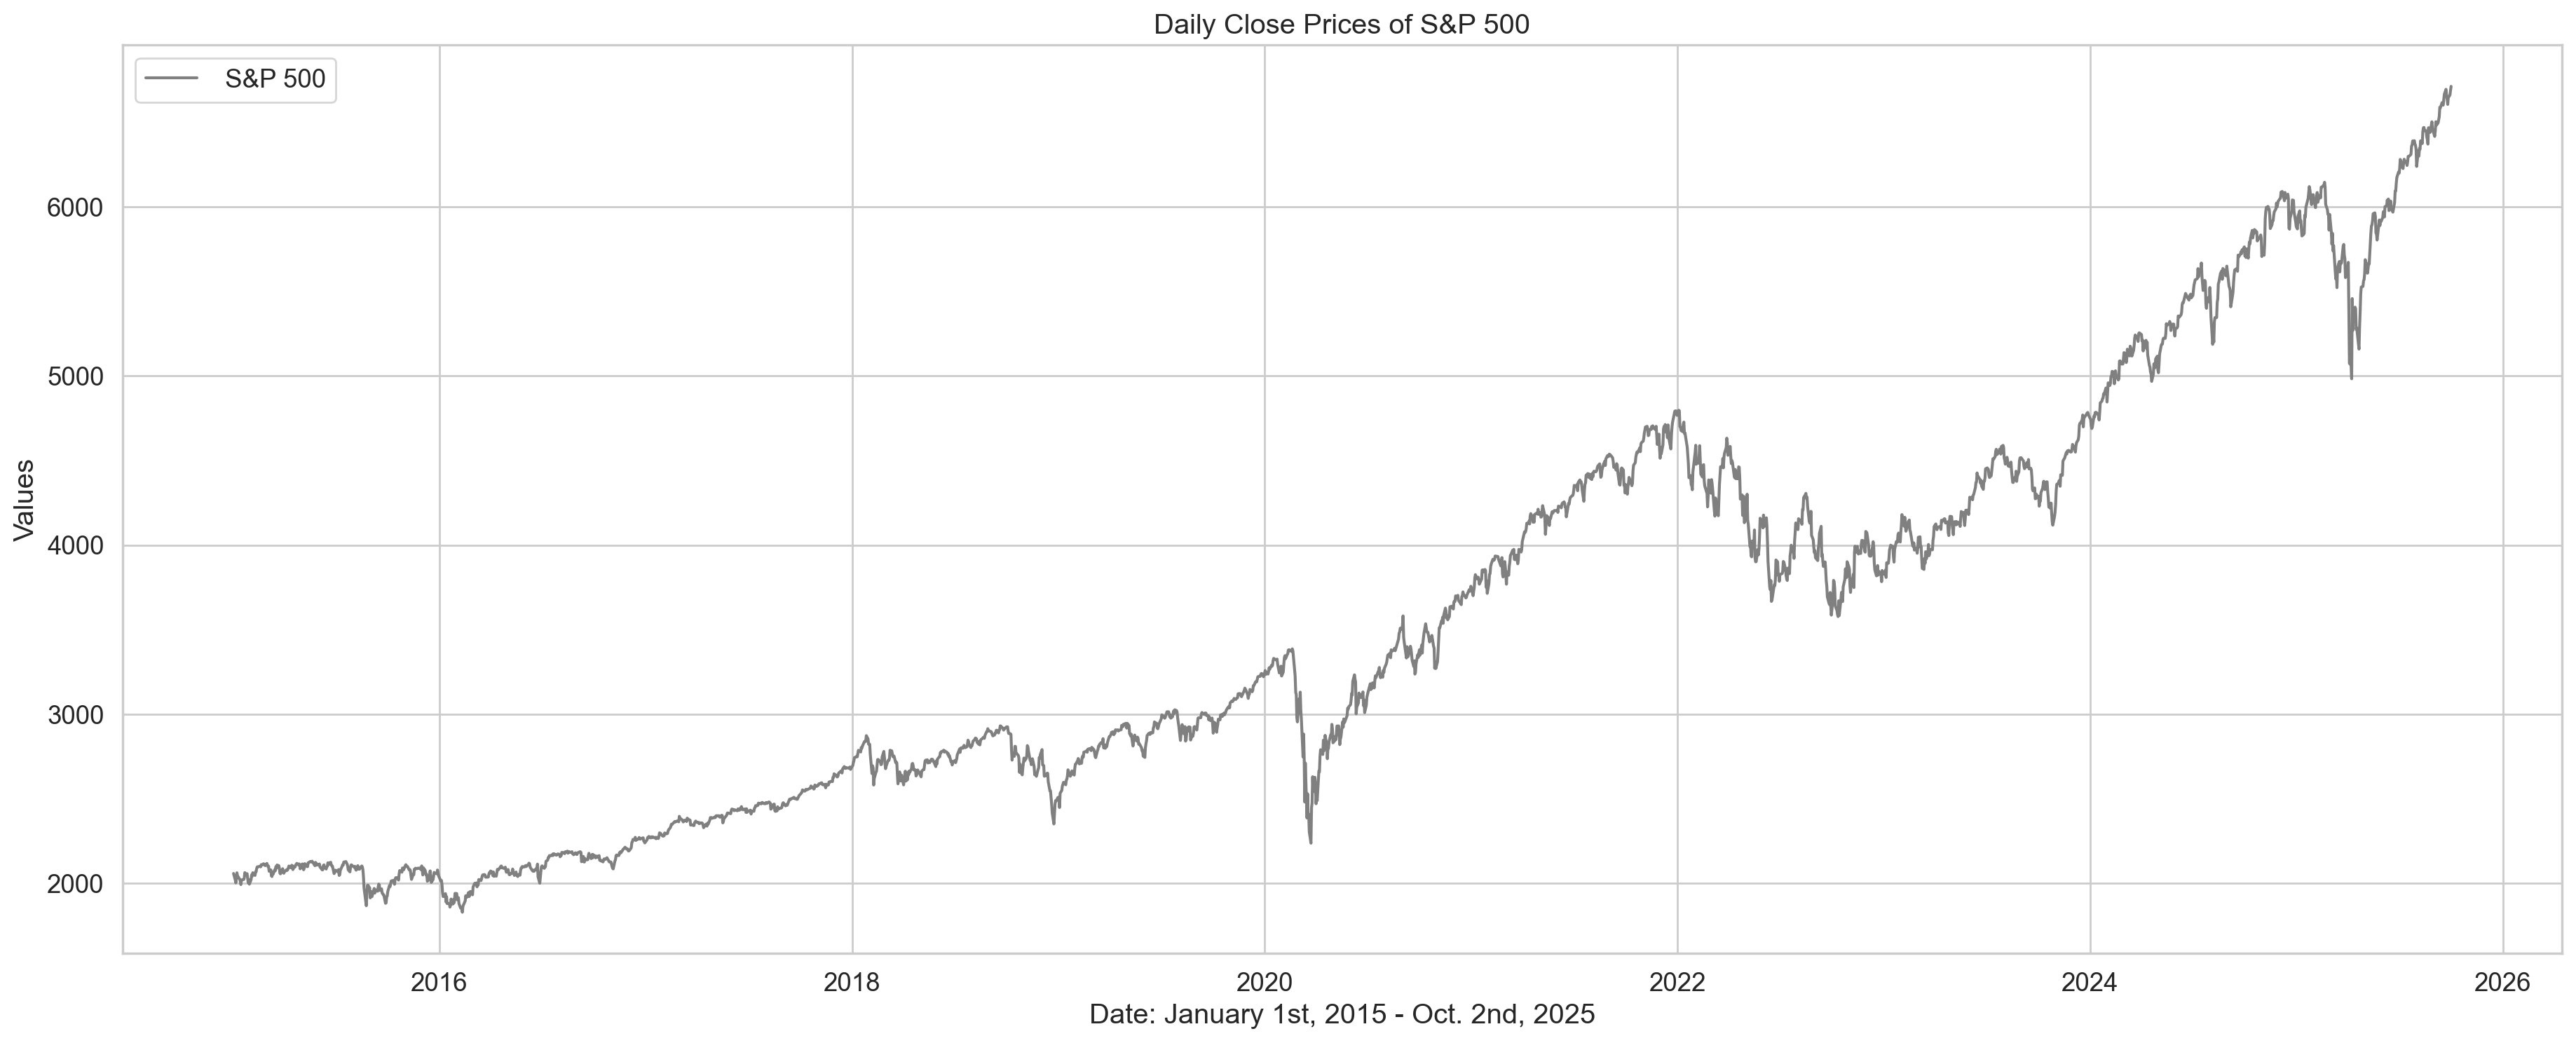

In [16]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: January 1st, 2015 - Oct. 2nd, 2025')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

In [42]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change()
dataset['R_AAPL'] = dataset[['AAPL']].pct_change()
dataset['R_NVDA'] = dataset[['NVDA']].pct_change()
dataset['R_AMZN'] = dataset[['AMZN']].pct_change()
dataset['R_MSFT'] = dataset[['MSFT']].pct_change()
dataset['R_META'] = dataset[['META']].pct_change()
dataset['R_AVGO'] = dataset[['AVGO']].pct_change()
dataset['R_GSPC'] = dataset[['GSPC']].pct_change()
dataset.head

<bound method NDFrame.head of                   GOOG        AAPL        NVDA        AMZN        MSFT  \
Date                                                                     
2015-01-02   25.990791   24.261049    0.483038   15.426000   39.933044   
2015-01-05   25.448997   23.577572    0.474880   15.109500   39.565830   
2015-01-06   24.859165   23.579796    0.460482   14.764500   38.985123   
2015-01-07   24.816574   23.910437    0.459282   14.921000   39.480438   
2015-01-08   24.894821   24.829128    0.476559   15.023000   40.641876   
...                ...         ...         ...         ...         ...   
2025-09-25  246.570007  256.869995  177.690002  218.149994  507.029999   
2025-09-26  247.179993  255.460007  178.190002  219.779999  511.459991   
2025-09-29  244.360001  254.429993  181.850006  222.169998  514.599976   
2025-09-30  243.550003  254.630005  186.580002  219.570007  517.950012   
2025-10-01  245.539993  255.449997  187.240005  220.630005  519.710022   

       

In [18]:
dataset.describe()

GOOG         AAPL         NVDA         AMZN         MSFT  \
count  2703.000000  2703.000000  2703.000000  2703.000000  2703.000000   
mean     89.460441   102.642975    29.243049   109.026586   199.694651   
std      50.716514    70.937041    44.525317    59.750364   137.883513   
min      24.393143    20.624048     0.459282    14.347500    34.501621   
25%      47.553577    36.407980     3.701744    49.740499    67.759220   
50%      71.413300    77.540283     8.454783    98.120003   175.453232   
75%     131.579559   165.118546    27.052025   160.968246   299.230286   
max     255.240005   258.103729   187.240005   242.059998   534.760925   

              META         AVGO         GSPC       R_GOOG       R_AAPL  \
count  2703.000000  2703.000000  2703.000000  2702.000000  2702.000000   
mean    252.017475    57.454477  3540.944783     0.000996     0.001039   
std     164.390419    66.877828  1250.177425     0.018148     0.018306   
min      73.596313     7.284194  1829.079956    -0.111008    -0.128647   
25%     140.265289    18.572794  2472.349976    -0.007226    -0.007397   
50%     187.096619    27.273594  3221.219971     0.001234     0.000951   
75%     311.136917    57.736000  4396.945068     0.009895     0.010117   
max     789.467163   368.937897  6711.200195     0.160524     0.153289   

            R_NVDA       R_AMZN       R_MSFT       R_META       R_AVGO  \
count  2702.000000  2702.000000  2702.000000  2702.000000  2702.000000   
mean      0.002679     0.001199     0.001095     0.001105     0.001698   
std       0.030827     0.020746     0.017036     0.023702     0.024407   
min      -0.187559    -0.140494    -0.147390    -0.263901    -0.199129   
25%      -0.012402    -0.008792    -0.006669    -0.009303    -0.010399   
50%       0.002672     0.001076     0.000959     0.000999     0.001238   
75%       0.017740     0.011398     0.009528     0.012173     0.013352   
max       0.298067     0.141311     0.142168     0.232824     0.244326   

            R_GSPC  
count  2702.000000  
mean      0.000502  
std       0.011348  
min      -0.119841  
25%      -0.003777  
50%       0.000691  
75%       0.005758  
max       0.095154

In [19]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AAPL', 'R_NVDA','R_AMZN','R_MSFT','R_META', 'R_AVGO',  'R_GSPC']].std()

R_GOOG    0.018148
R_AAPL    0.018306
R_NVDA    0.030827
R_AMZN    0.020746
R_MSFT    0.017036
R_META    0.023702
R_AVGO    0.024407
R_GSPC    0.011348
dtype: float64

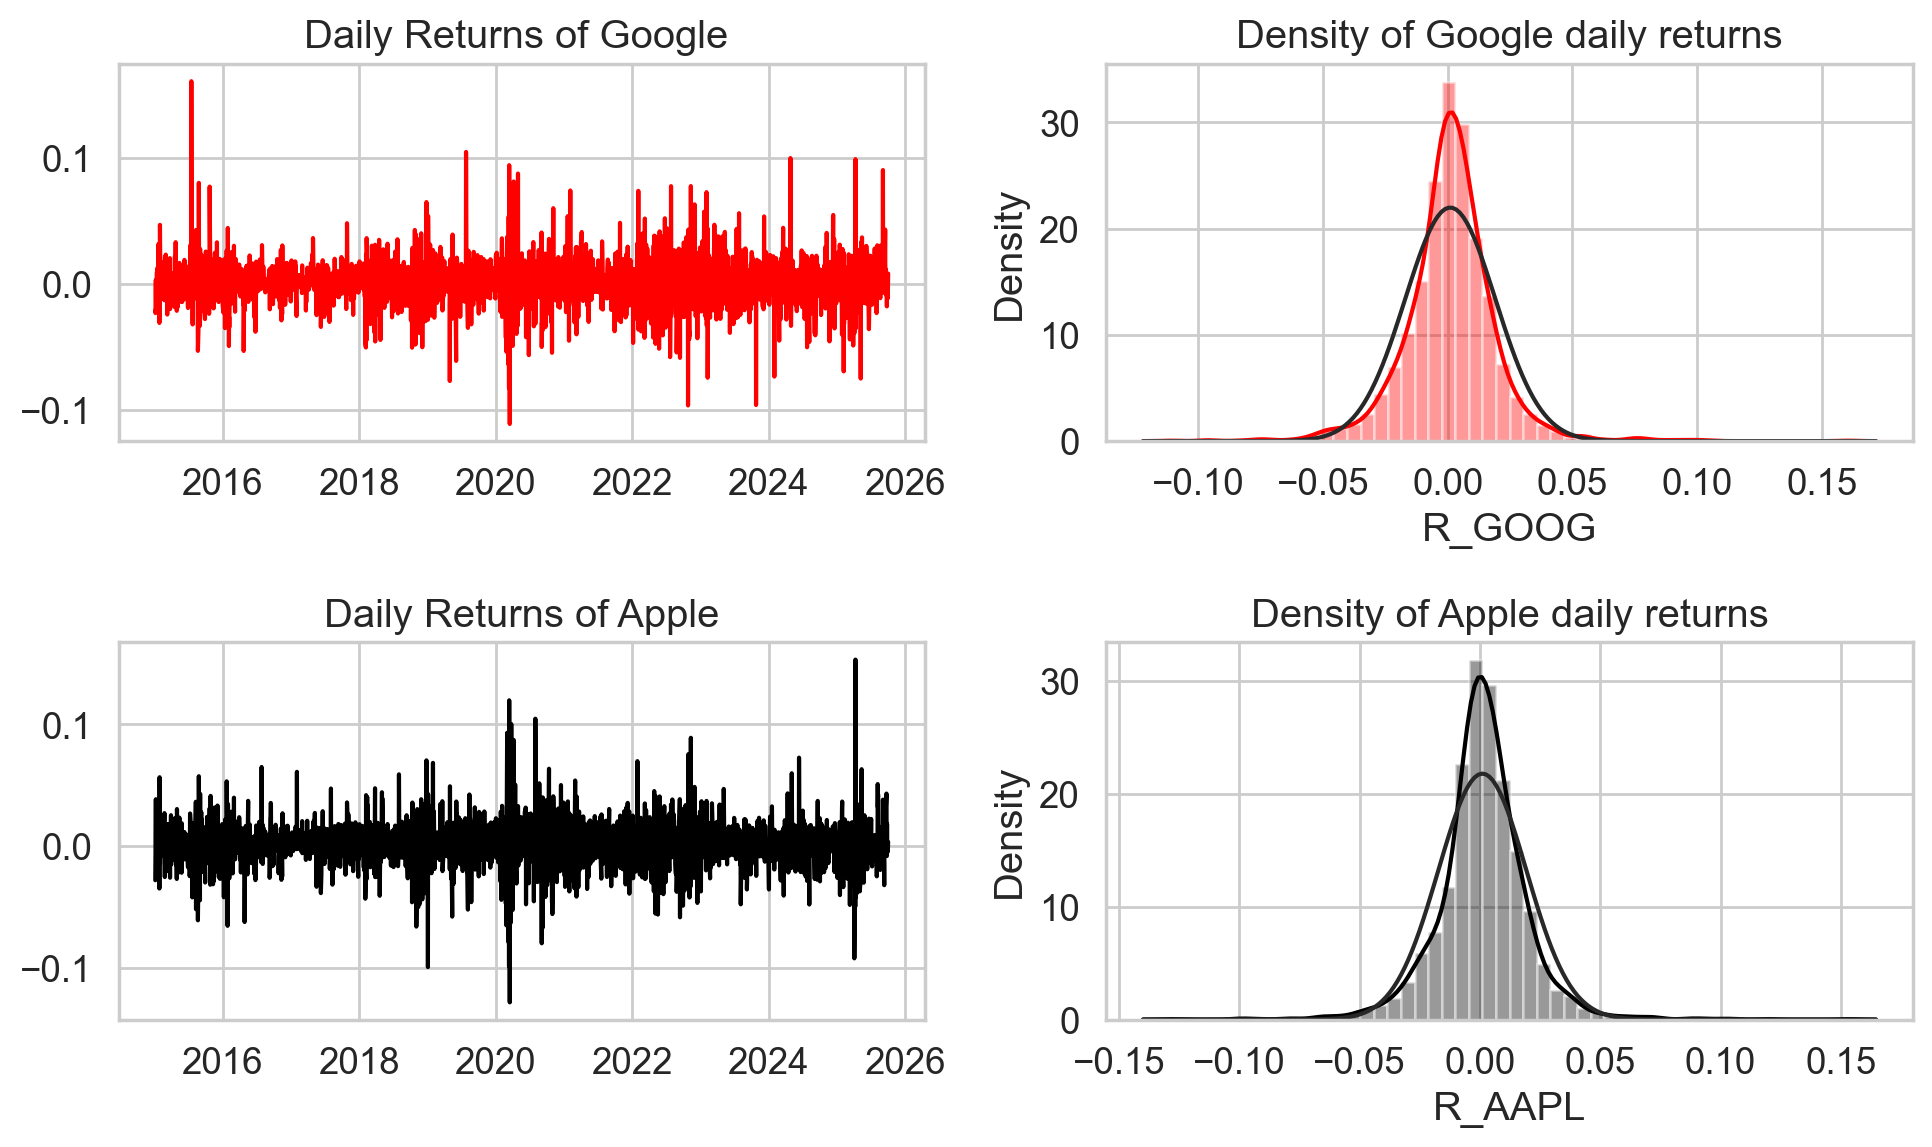

In [22]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Returns of Google ')
    sns.distplot(dataset['R_GOOG'], norm_hist=True, fit=stats.norm, color='red',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Google daily returns')
    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Returns of Apple')
    sns.distplot(dataset['R_AAPL'], norm_hist=True, fit=stats.norm, color='black',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Apple daily returns')
    plt.tight_layout()
    #fig.show()
    plt.show()

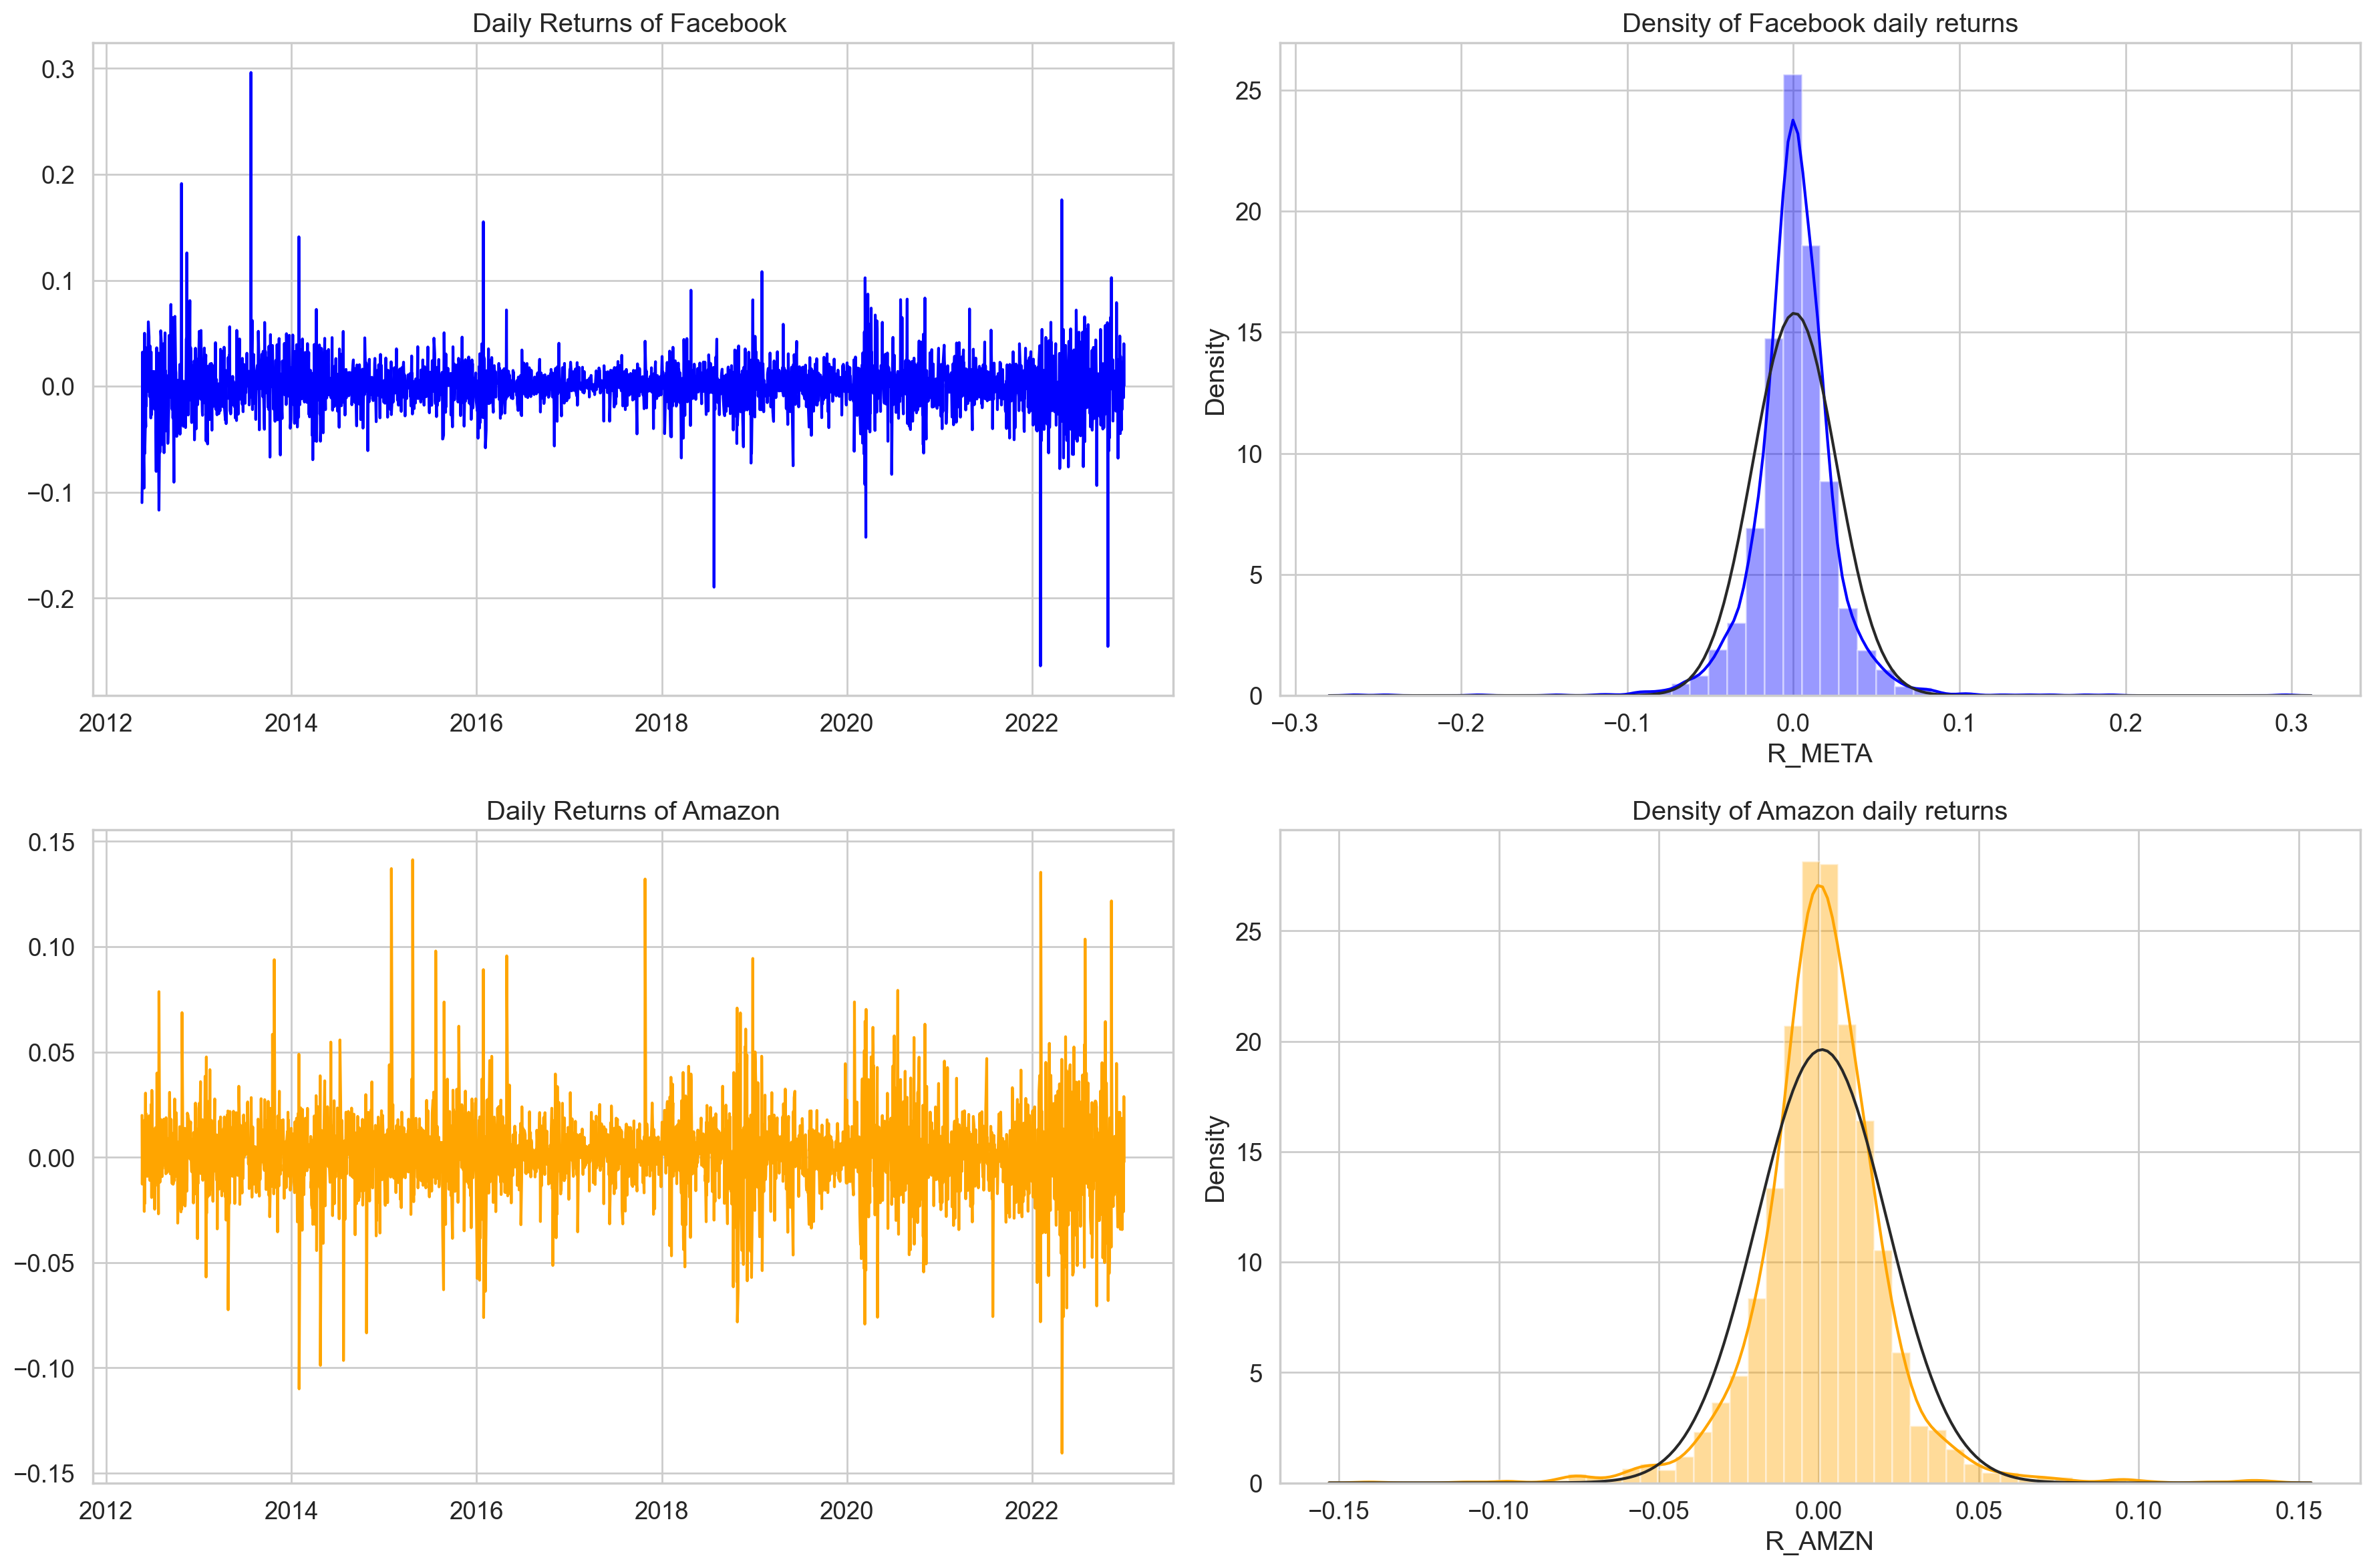

In [17]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Daily Returns of Facebook ')
    sns.distplot(dataset['R_META'], norm_hist=True, fit=stats.norm, color='blue',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Facebook daily returns')
    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Daily Returns of Amazon')
    sns.distplot(dataset['R_AMZN'], norm_hist=True, fit=stats.norm, color='orange',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Amazon daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()

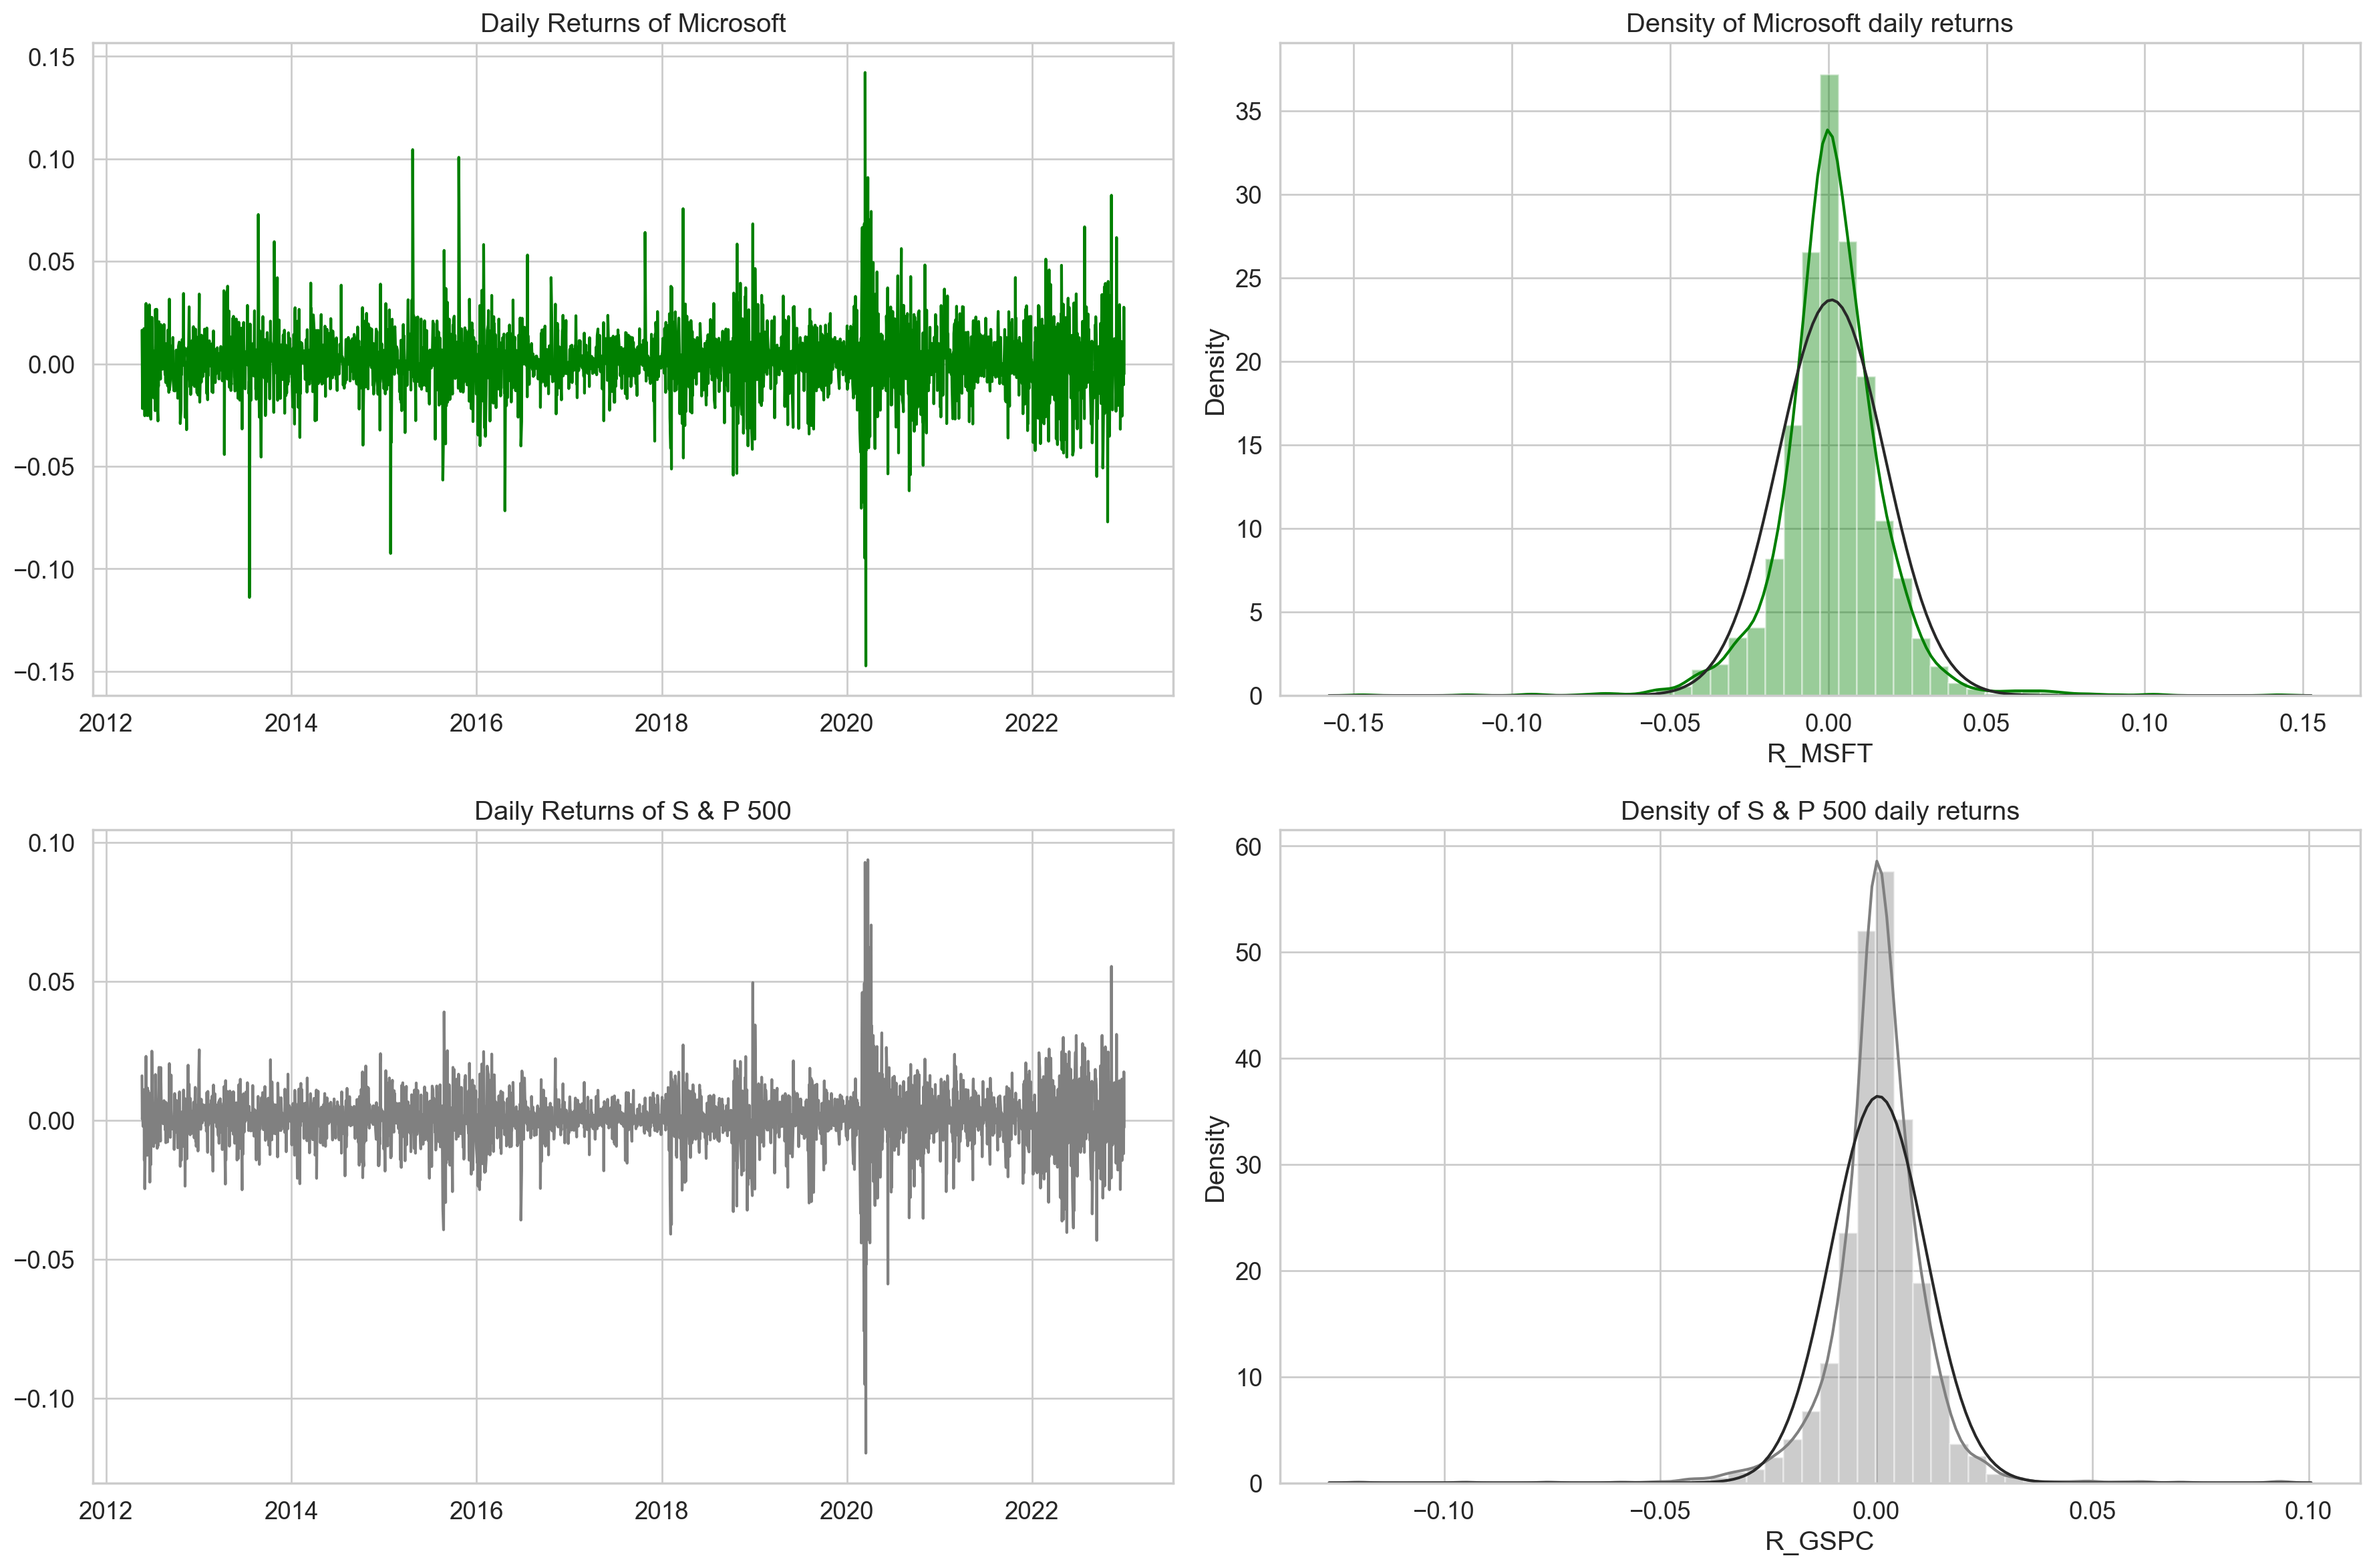

In [18]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Daily Returns of Microsoft')
    sns.distplot(dataset['R_MSFT'], norm_hist=True, fit=stats.norm, color='green',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Microsoft daily returns')
    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')
    sns.distplot(dataset['R_GSPC'], norm_hist=True, fit=stats.norm, color='grey',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of S & P 500 daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()
    fig.savefig('test1')

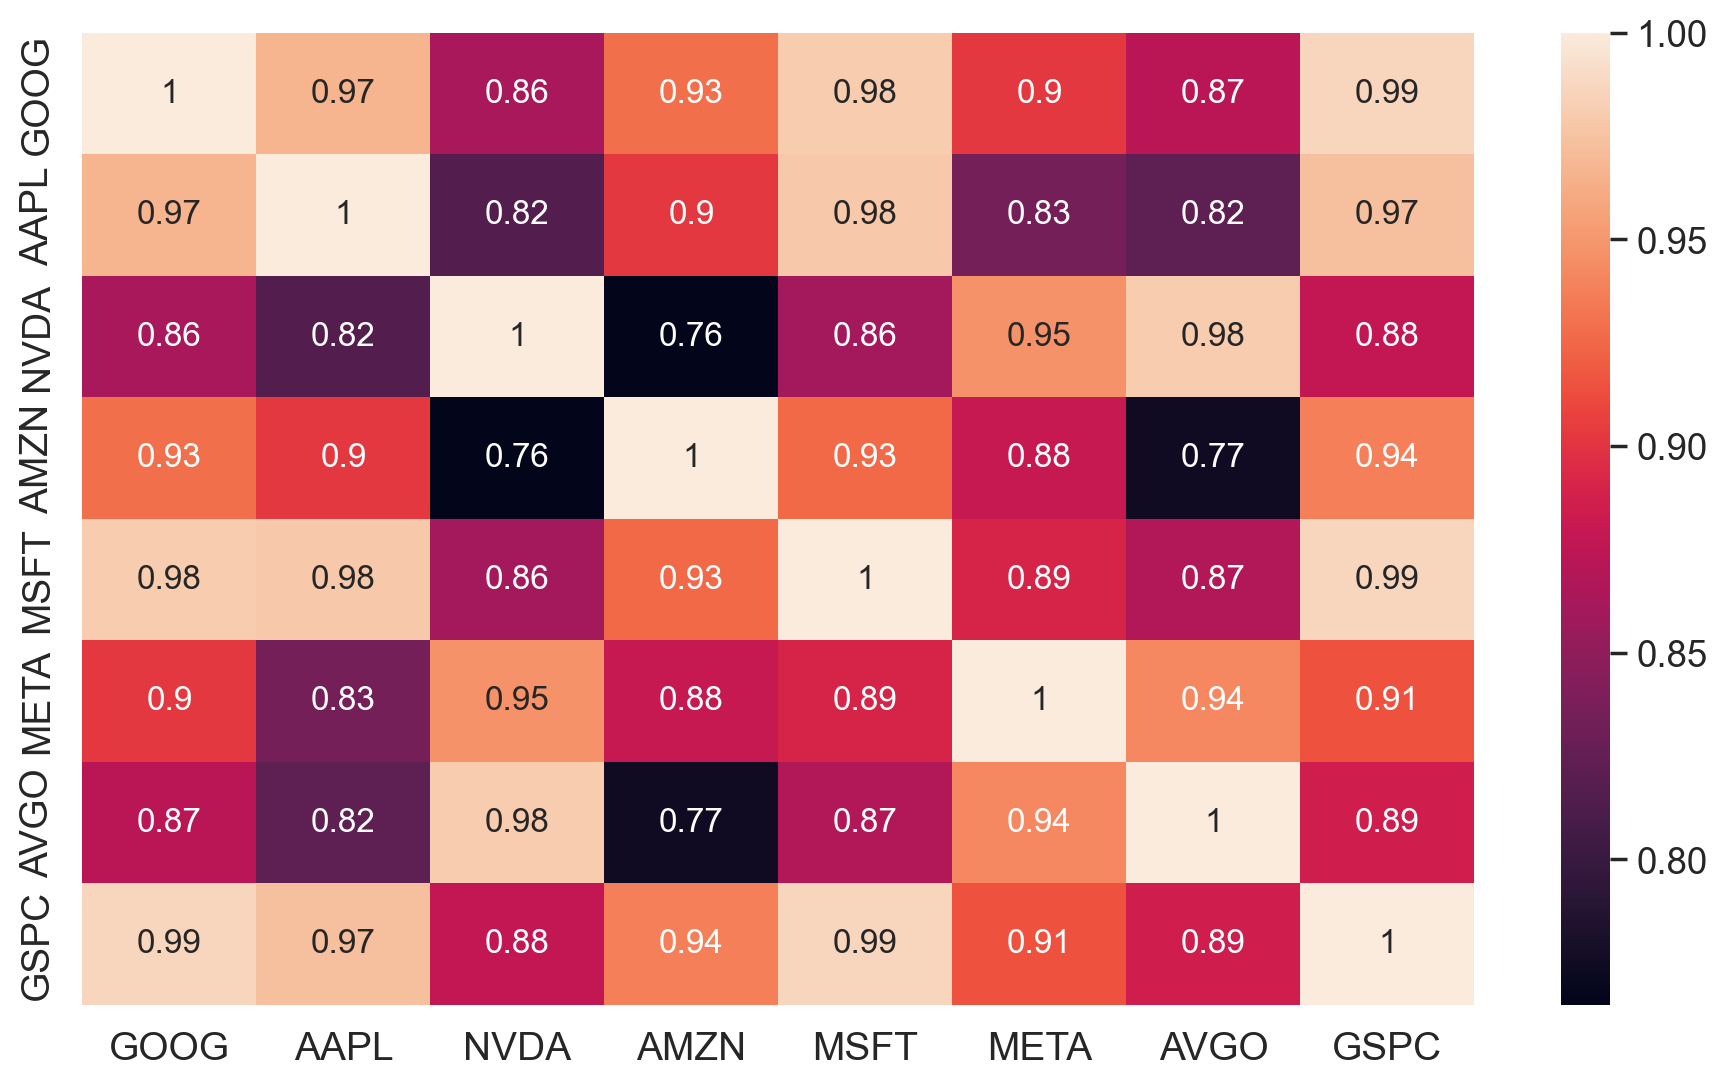

In [23]:
corr = dataset[['GOOG','AAPL','NVDA','AMZN','MSFT','META','AVGO', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

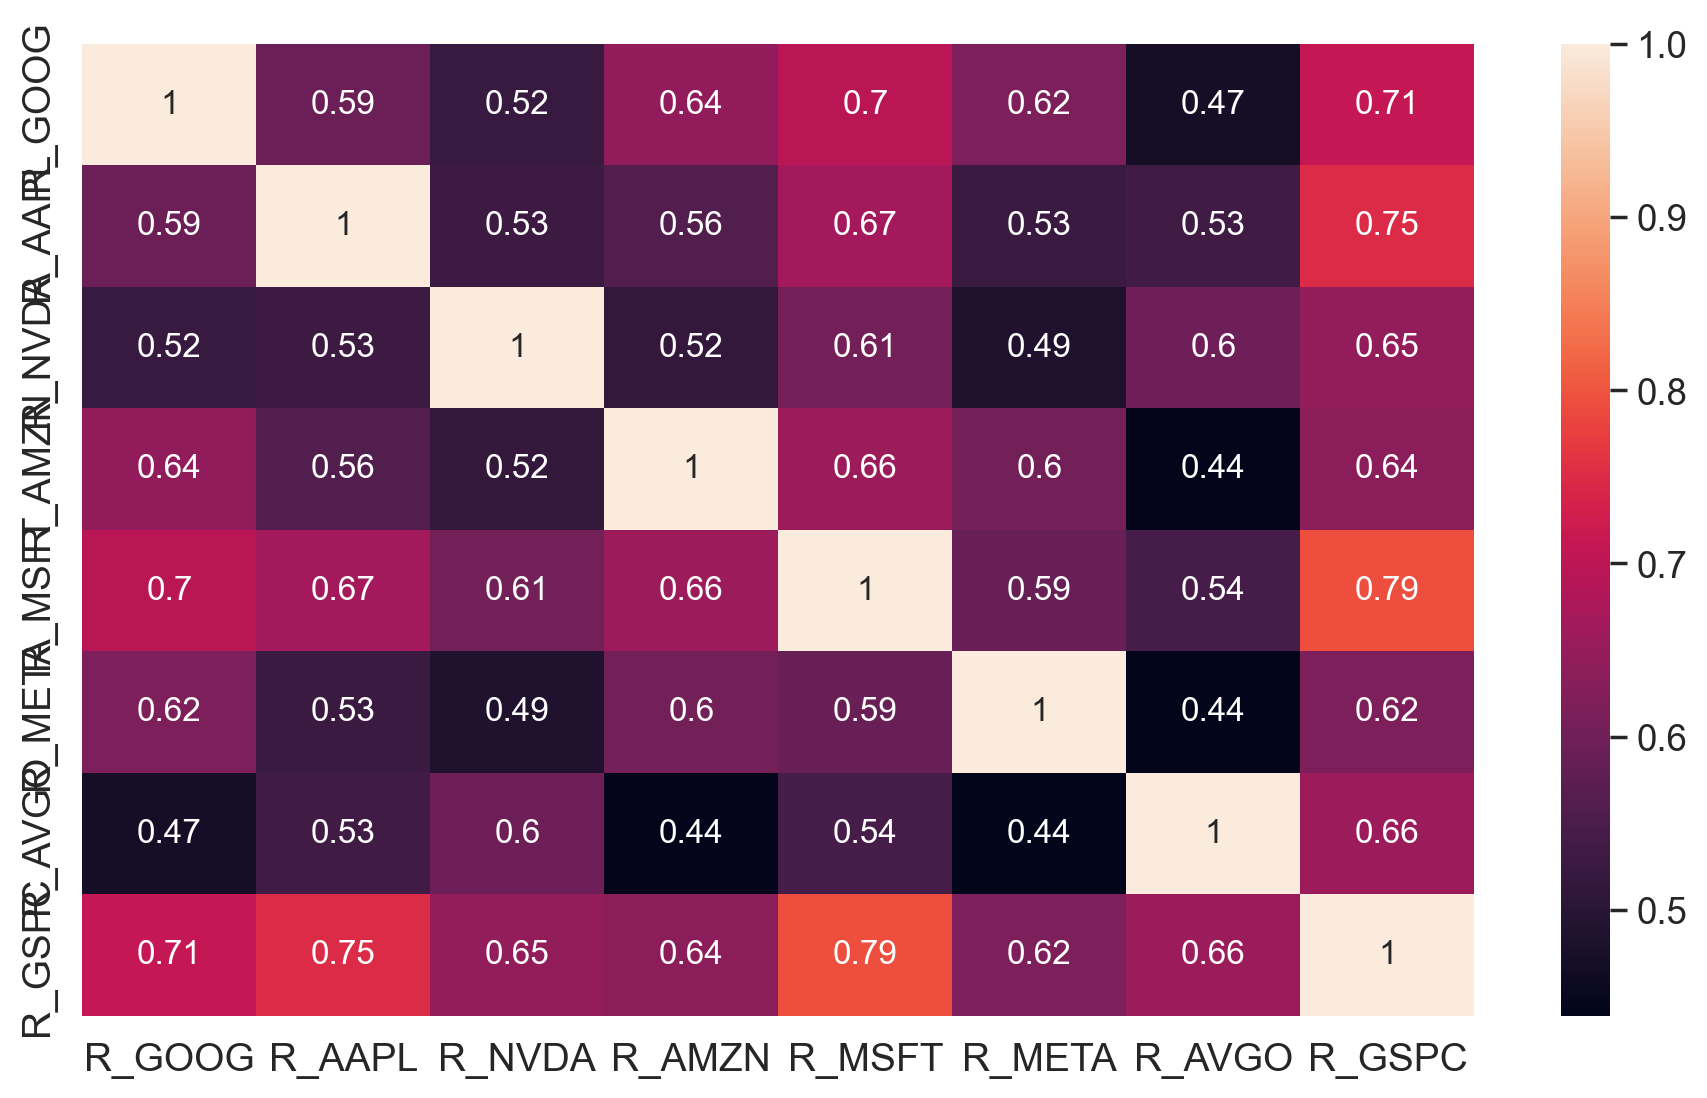

In [24]:
corr = dataset[['R_GOOG','R_AAPL','R_NVDA','R_AMZN','R_MSFT','R_META','R_AVGO', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [25]:
returns = dataset[['R_GOOG','R_AAPL','R_NVDA','R_AMZN','R_MSFT','R_META','R_AVGO', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 28.81 % per year
The volatility of the stock of R_AAPL = 29.06 % per year
The volatility of the stock of R_NVDA = 48.94 % per year
The volatility of the stock of R_AMZN = 32.93 % per year
The volatility of the stock of R_MSFT = 27.04 % per year
The volatility of the stock of R_META = 37.62 % per year
The volatility of the stock of R_AVGO = 38.75 % per year
The volatility of the stock of R_GSPC = 18.01 % per year


In [26]:
returns = dataset[['R_GOOG','R_AAPL','R_NVDA','R_AMZN','R_MSFT','R_META','R_AVGO', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 8.32 % per month
The volatility of the stock of R_AAPL = 8.39 % per month
The volatility of the stock of R_NVDA = 14.13 % per month
The volatility of the stock of R_AMZN = 9.51 % per month
The volatility of the stock of R_MSFT = 7.81 % per month
The volatility of the stock of R_META = 10.86 % per month
The volatility of the stock of R_AVGO = 11.18 % per month
The volatility of the stock of R_GSPC = 5.2 % per month


In [27]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf ) / volatility
    return sharpe

In [28]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.78
The Sharpe ratio of, R_AAPL = 0.81
The Sharpe ratio of, R_NVDA = 1.33
The Sharpe ratio of, R_AMZN = 0.84
The Sharpe ratio of, R_MSFT = 0.93
The Sharpe ratio of, R_META = 0.67
The Sharpe ratio of, R_AVGO = 1.04
The Sharpe ratio of, R_GSPC = 0.56


In [29]:
cov = returns.cov() * 12 # annualized
cov

R_GOOG    R_AAPL    R_NVDA    R_AMZN    R_MSFT    R_META    R_AVGO  \
R_GOOG  0.003952  0.002368  0.003517  0.002905  0.002586  0.003187  0.002507   
R_AAPL  0.002368  0.004021  0.003595  0.002547  0.002499  0.002740  0.002866   
R_NVDA  0.003517  0.003595  0.011404  0.003956  0.003815  0.004268  0.005404   
R_AMZN  0.002905  0.002547  0.003956  0.005165  0.002791  0.003562  0.002692   
R_MSFT  0.002586  0.002499  0.003815  0.002791  0.003483  0.002859  0.002706   
R_META  0.003187  0.002740  0.004268  0.003562  0.002859  0.006741  0.003047   
R_AVGO  0.002507  0.002866  0.005404  0.002692  0.002706  0.003047  0.007149   
R_GSPC  0.001755  0.001866  0.002714  0.001802  0.001839  0.001991  0.002185   

          R_GSPC  
R_GOOG  0.001755  
R_AAPL  0.001866  
R_NVDA  0.002714  
R_AMZN  0.001802  
R_MSFT  0.001839  
R_META  0.001991  
R_AVGO  0.002185  
R_GSPC  0.001545

In [30]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 0.4727309071713499


In [27]:
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')

Beta (10Y period) of Apple is : 1.1729651110801813


In [28]:
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')

Beta (10Y period) of Facebook is : 1.2000175713268197


In [ ]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf ) / volatility
    return sharpe

In [31]:
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')

Beta (10Y period) of Amazon is : 0.5284017444764945


In [30]:
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 1.1938834203824897


In [31]:
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


In [32]:
from scipy.optimize import minimize

In [33]:
# Portfolio Simulation
portfolio = 2673 # generation of a portfolio
n_assets = returns.shape[1]
weights = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns = returns.mean()
sigma = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol = np.zeros(portfolio)
sharpe_ratio = np.zeros(portfolio)
rf_rate = 0.0 # risk free rate
for i in range(portfolio):
    w = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i] = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i] = (expected_returns[i]-rf_rate)/expected_vol[i]

In [34]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T, 
                        np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p = portfolio_volatility(weight)
    return return_p, vol_p

In [35]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():
    
    def sum_one(weight):
        w= weight
        return np.sum(weight)-1
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist() # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
        bounds =((0,1),)*n_assets,
        constraints = weight_constraints)

In [36]:
def min_vol():
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility,w0,method='SLSQP',
        bounds = bounds,
        constraints = weight_constraints)

In [37]:
def efficient_portfolio_target(target):
    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
    {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility,w0, method = 'SLSQP',
        bounds = bounds,
        constraints = constraints)

In [38]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

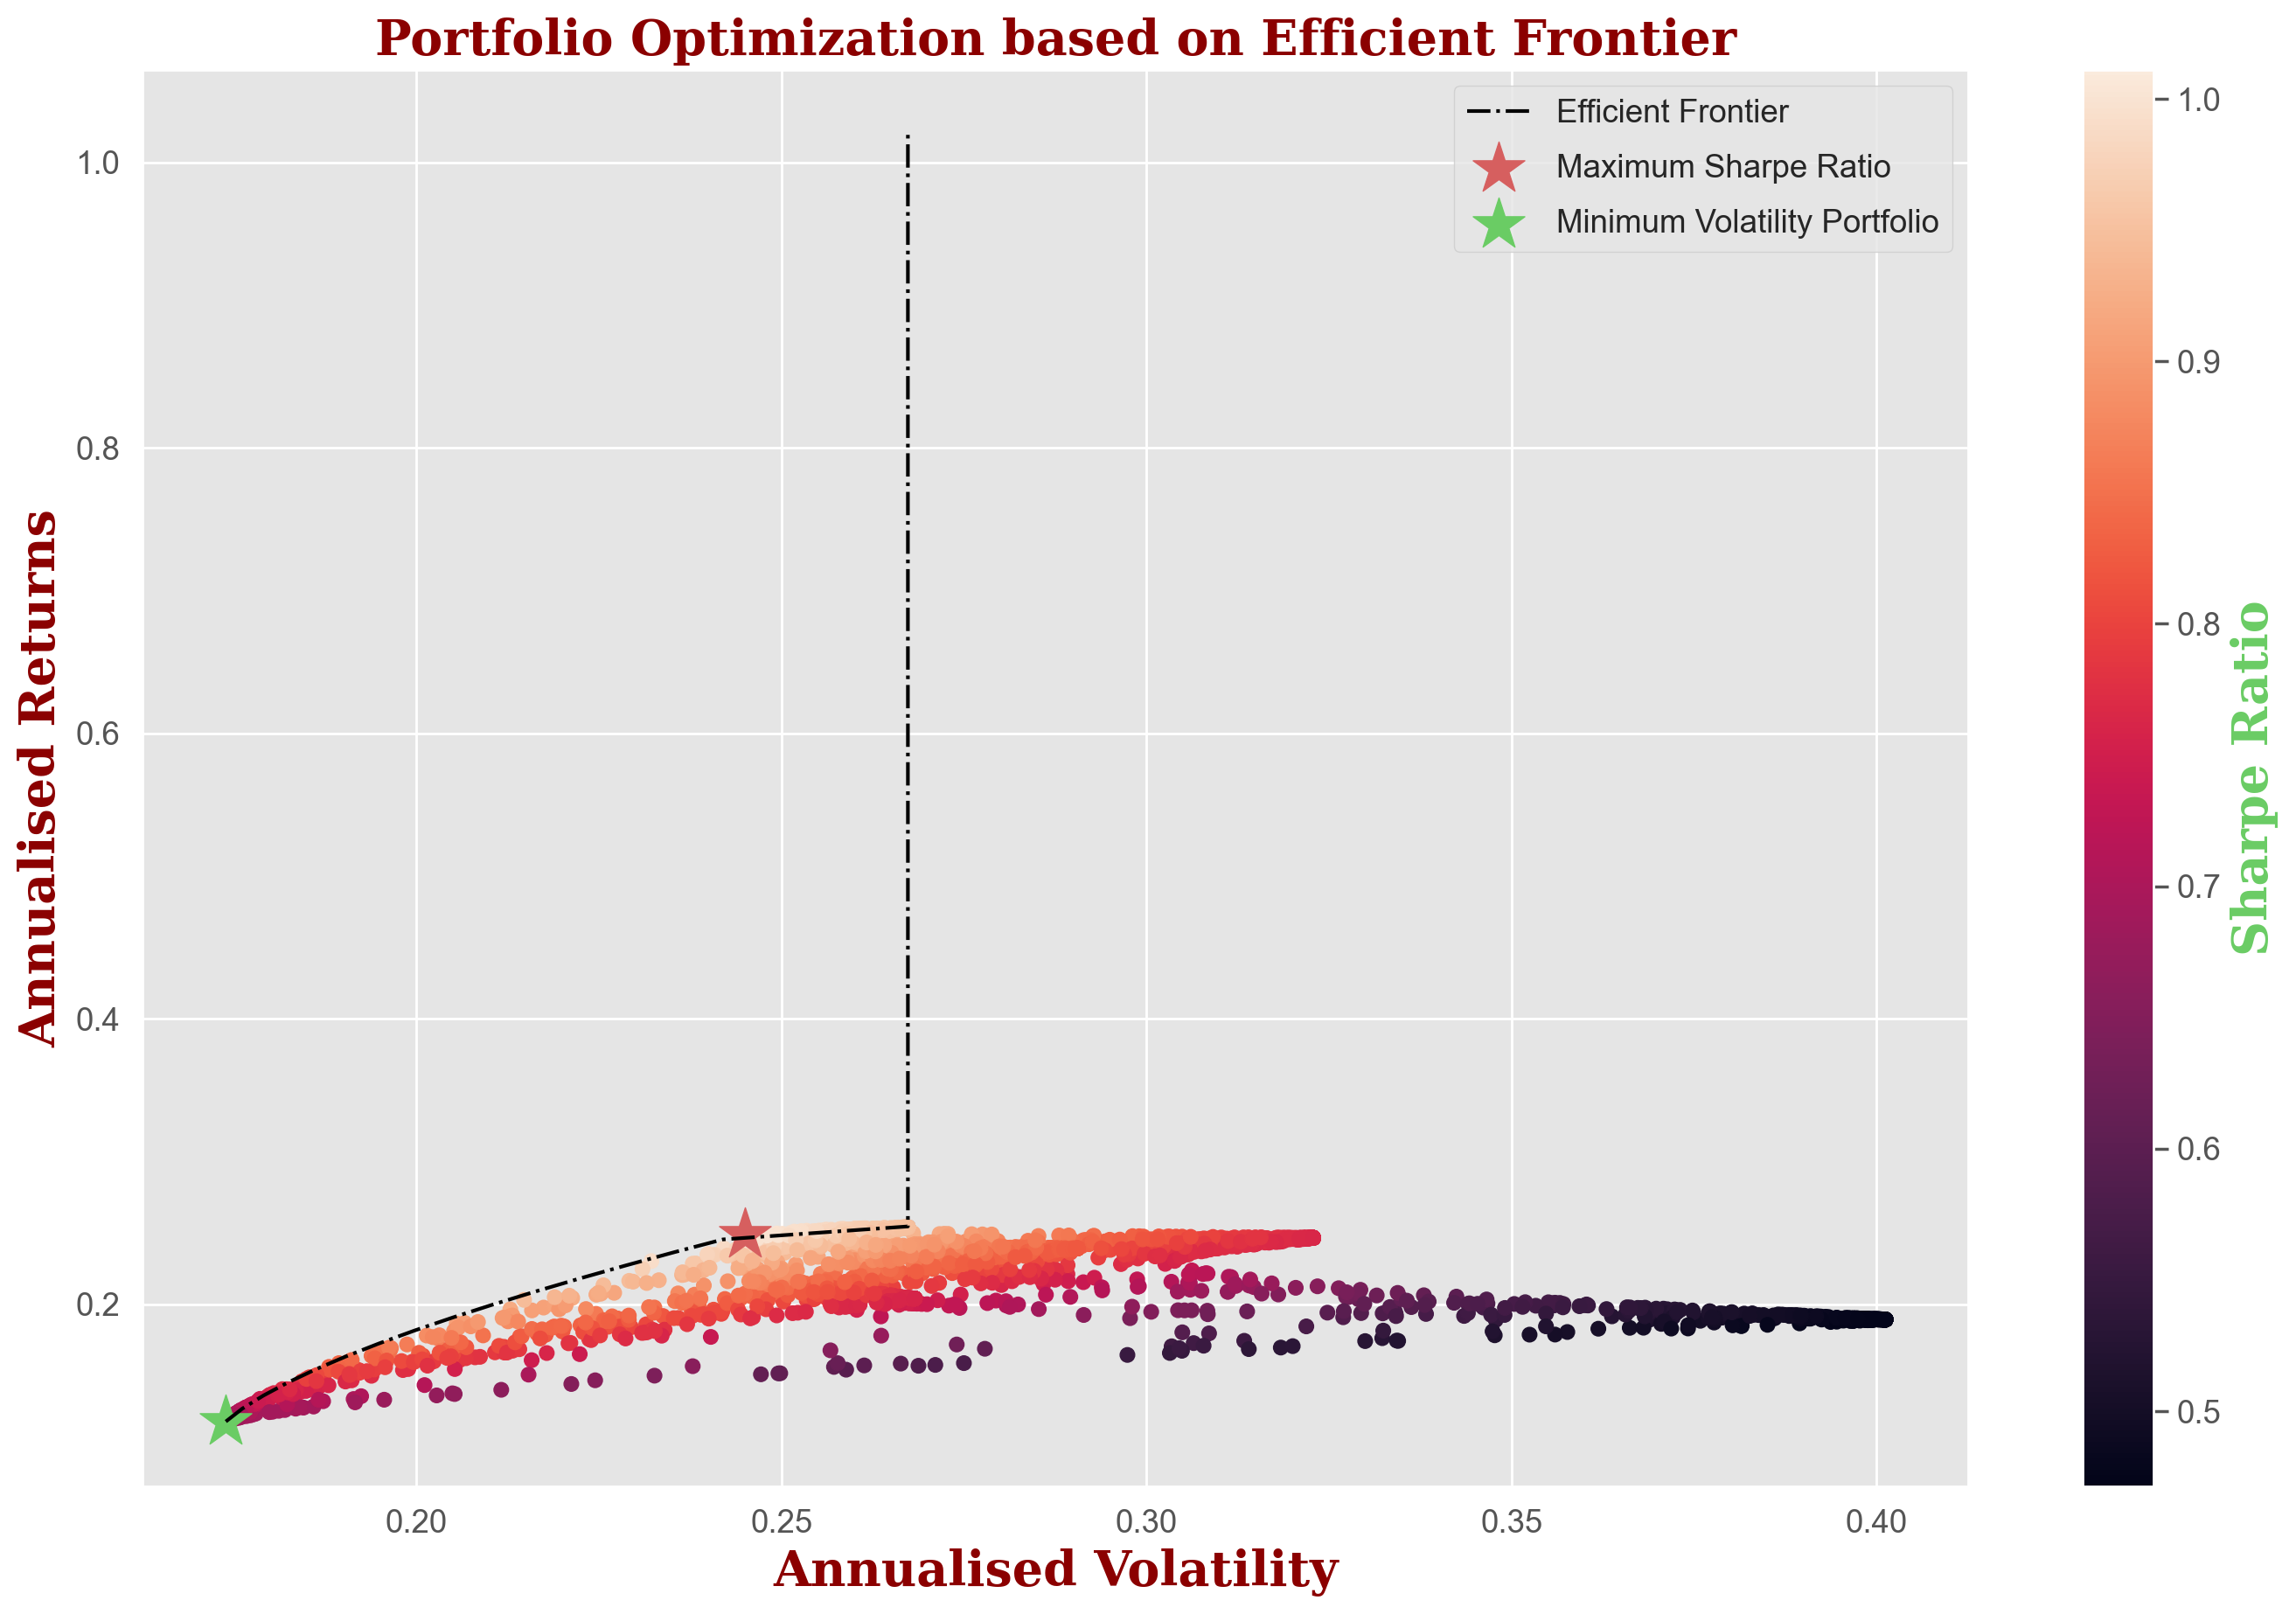

In [39]:
sharpe_maximum = max_sharpe_ratio()
return_p,vol_p = portfolio_performance(sharpe_maximum['x'])
min_volatility = min_vol()
return_min,vol_min = portfolio_performance(min_volatility['x'])

plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g', marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

In [40]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array

        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]

    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [41]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)

In [42]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio

In [43]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

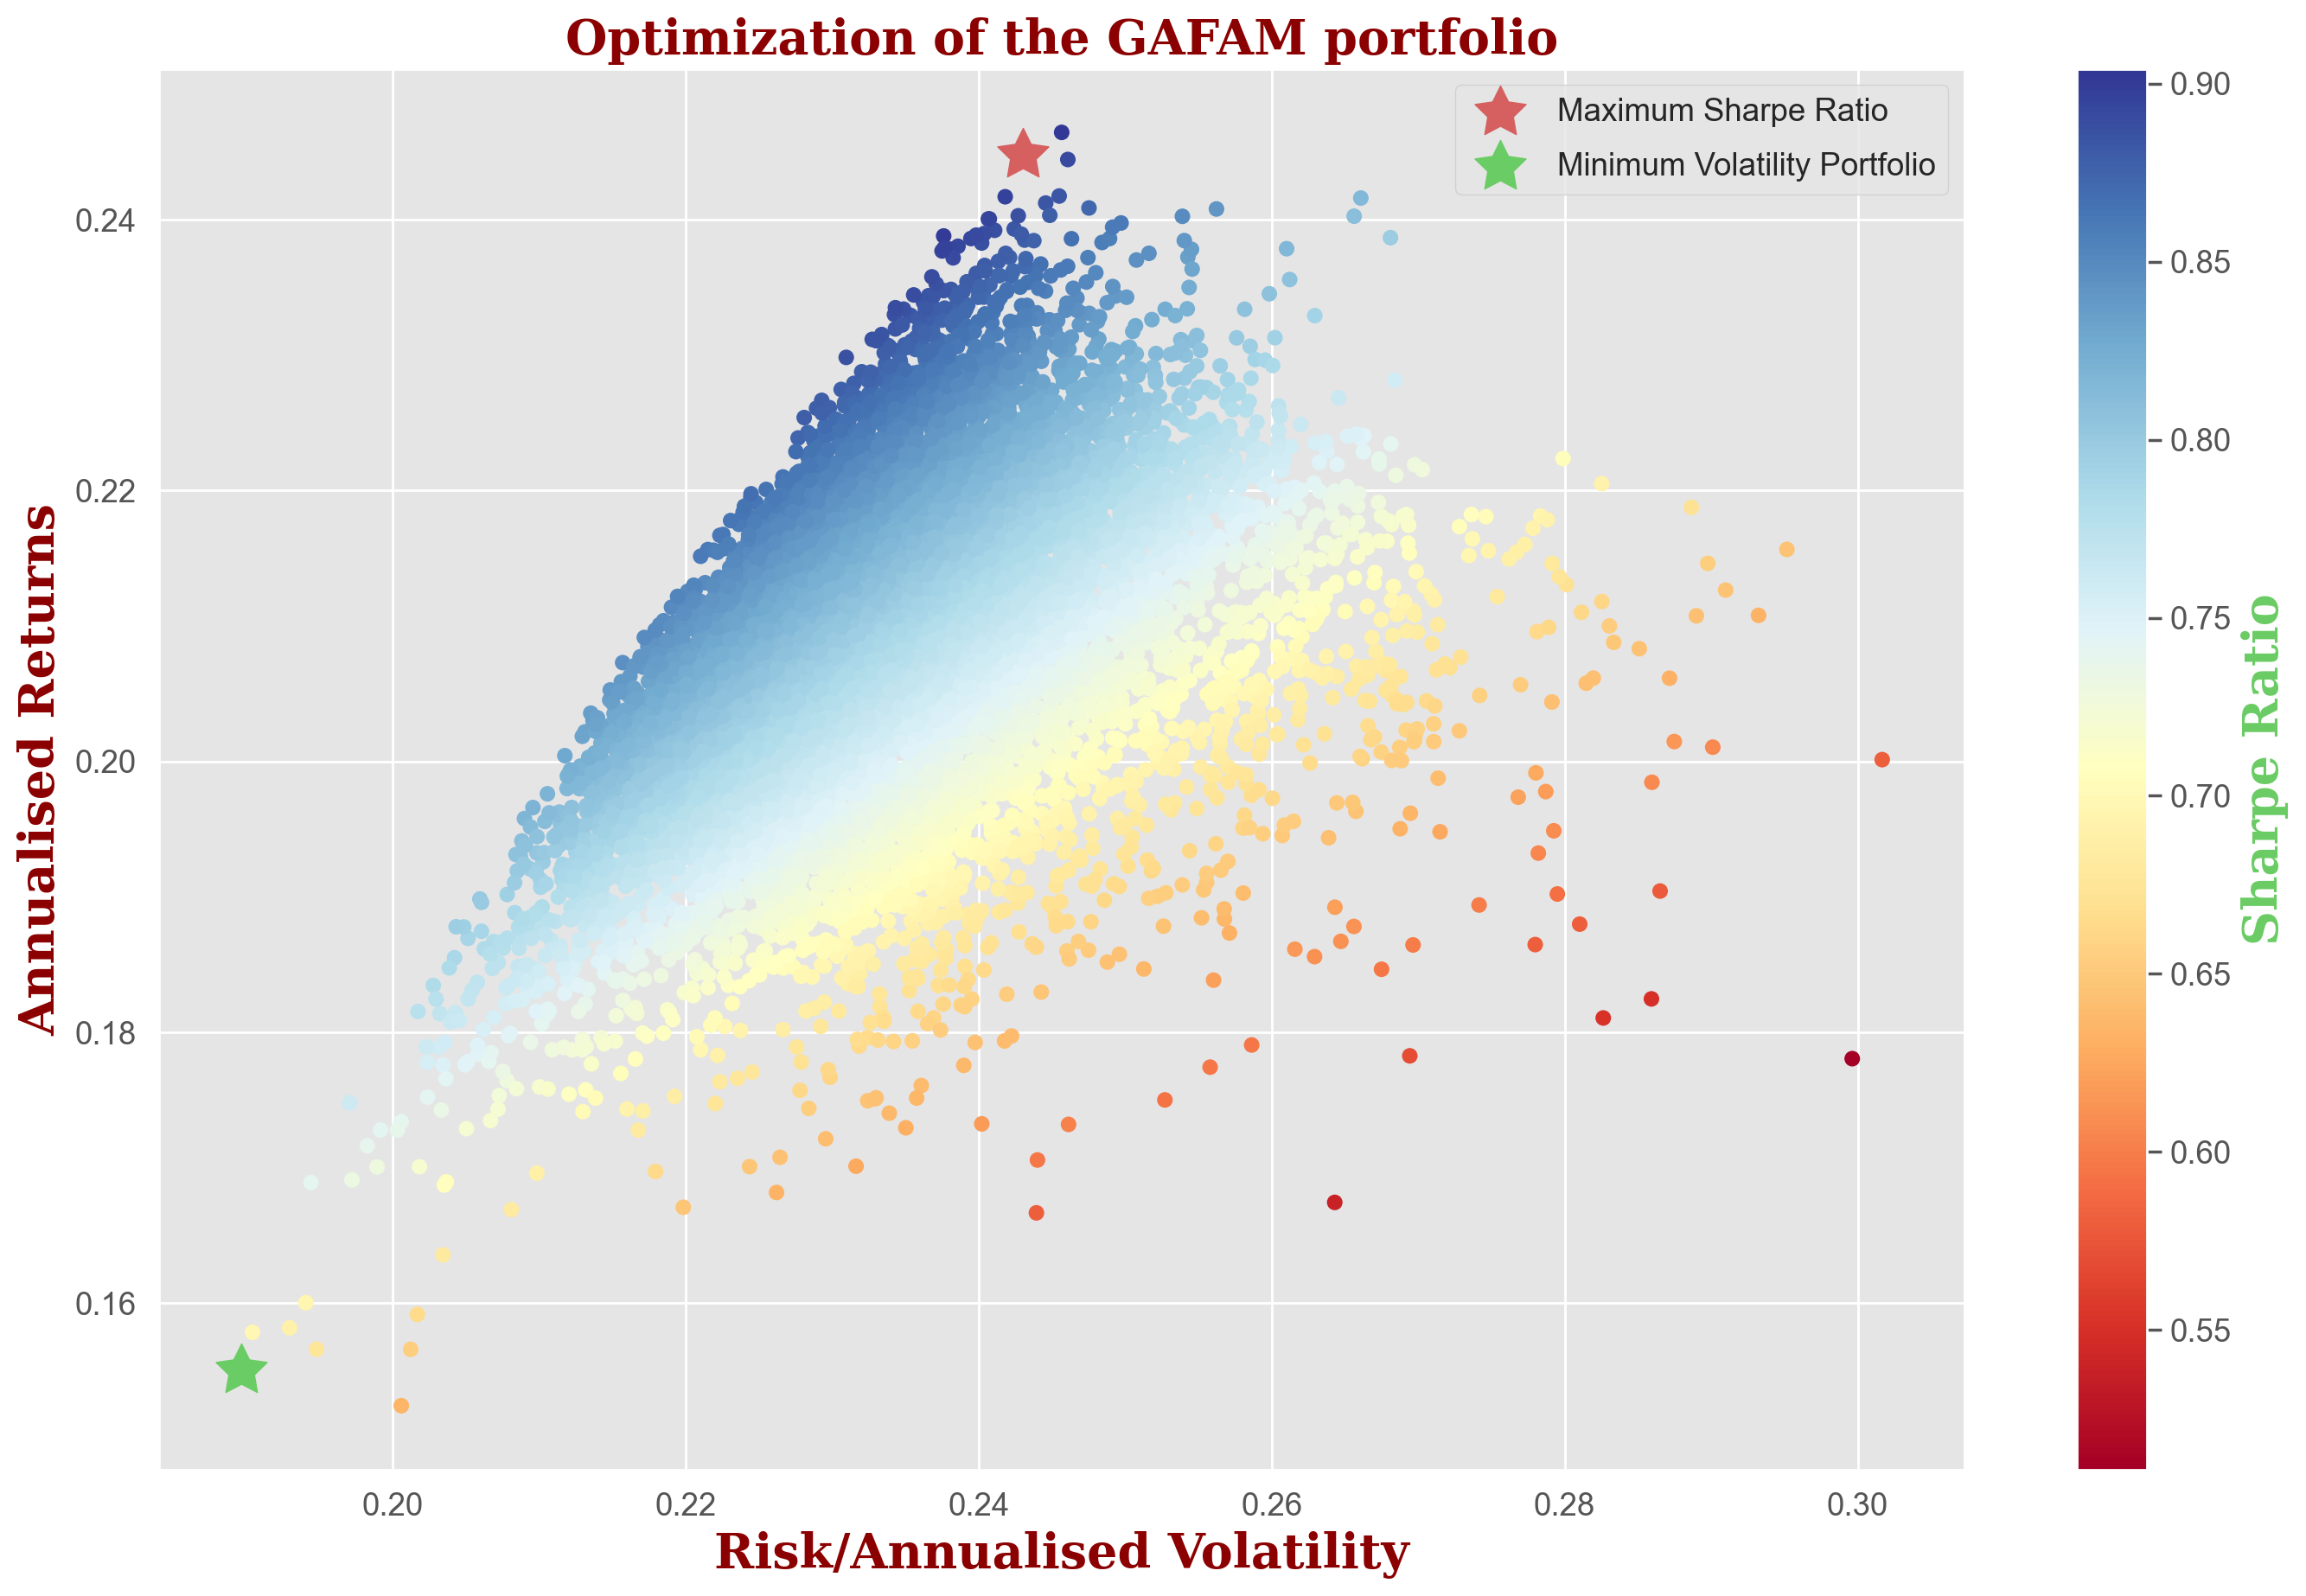

In [44]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

In [45]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower than

ret     stdev    sharpe      GOOG      AAPL      META      AMZN  \
3270  0.24477  0.243055  0.904201  0.011955  0.269486  0.034679  0.209609   

          MSFT      GSPC  
3270  0.469536  0.004734

In [46]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio

ret     stdev    sharpe      GOOG     AAPL      META      AMZN  \
2695  0.155058  0.189667  0.685718  0.129409  0.07794  0.052775  0.016958   

          MSFT      GSPC  
2695  0.079501  0.643417